In [1]:
#importation de la base et des packages
import pandas as pd
import numpy as np
import statsmodels.discrete.discrete_model as discrete_model
import statsmodels.discrete.conditional_models as conditional_models
import re
df=pd.read_csv(r'C:\Users\sylva\OneDrive\Bureau\barometre\tableau 05.csv', sep=';')

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
var_quest=['Deplacement_a_pied','Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche']

In [3]:
var_indicateur=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global', 'Indicateur_global_declare']
def yo_float(x):
    return float(str(x).replace(',','.'))/20


def indicateurs_nombres(df1, liste_indicateur=var_indicateur):
    for indicateur in liste_indicateur :
        if indicateur in df1.columns:
            df1[indicateur]=df1[indicateur].apply(yo_float)
    return df1
df=indicateurs_nombres(df)
df=indicateurs_nombres(df, var_quest)

In [4]:
#création d'un dataframe contenant uniquement la note voulue et les informations
var_exo=['Sexe_repondant','Age_repondant', 'Membre_association_marche', 'Taille','Taille_commune_2', 'Membre_association_defense_pietons',
         'Permis_de_conduire', 'Abonnement_transport_commun', 'Ville', 'Deplacement_a_pied_vie_courante', 
         'Deplacement_a_pied_loisir','Buts_frequents_deplacements', 'Lieu_marche', 'Lors_de_vos_deplacements', 'Malvoyant']

var=var_exo+['Indicateur_global']
df_simple=df[var]
df_simple['Constante']=1


<ipython-input-4-e0156f5da38d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['Constante']=1


recodage en variable quantitative

In [5]:
def valeur_sexe(df1=df_simple) :
    liste=[]
    for i in df1['Sexe_repondant'] :
        if i=='Femme':
            liste.append(1)
        elif i=='Homme':
            liste.append(0)#ignore les 618 ne souhaite pas répondre 
        else :
            liste.append(np.nan)
    df1['Sexe']=np.array(liste)

In [6]:
def valeur_age(df1=df_simple):
    liste=[]
    for i in df1['Age_repondant'] :
        if i=='De 45 à 54 ans':
            liste.append(50)
        elif i=='De 65 à 74 ans':
            liste.append(70)
        elif i=='De 35 à 44 ans':
            liste.append(40)
        elif i=='De 26 à 34 ans':
            liste.append(30)
        elif i=='75 ans et plus':
            liste.append(80)
        elif i=='De 55 à 64 ans':
            liste.append(60)
        elif i=='De 18 à 25 ans':
            liste.append(20)
        elif i=='Moins de 18 ans':
            liste.append(16)
        else :
            liste.append(np.nan)
    df1['Age']=np.array(liste)

In [7]:
def valeur_taille(df1=df_simple):
    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='De 5000 et 19 999 habitants':
            liste.append(12.5)
        elif i =='De 100 000 et 199 999 habitants':
            liste.append(150)
        elif i =='De 20 000 et 49 999 habitants':
            liste.append(35)
        elif i =='De 50 000 et 99 999 habitants':
            liste.append(75)
        elif i =='200 000 habitants ou plus':
            liste.append(350)
        elif i =='Moins de 5000 habitants':
            liste.append(2.5)
        else :
            liste.append(np.nan)
    df1['Taille']=np.array(liste)

In [8]:
def valeur_membre_marche(df1=df_simple):
    liste=[]
    for i in df1['Membre_association_marche']:
        if i=='Oui':
            liste.append(1)
        elif i=='Non':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Membre_marche']=np.array(liste)

def valeur_membre_pieton(df1=df_simple):
    liste=[]
    for i in df1['Membre_association_defense_pietons']:
        if i=='Oui':
            liste.append(1)
        elif i=='Non':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Membre_pieton']=np.array(liste)


In [9]:
def valeur_permis(df1=df_simple):
    liste=[]
    for i in df1['Permis_de_conduire']:
        if i=='Oui':
            liste.append(1)
        elif i=='Non':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Permis']=np.array(liste)

def valeur_transport(df1=df_simple):
    liste=[]
    for i in df1['Abonnement_transport_commun']:
        if i=='Oui':
            liste.append(1)
        elif i=='Non':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Transport']=np.array(liste)

In [10]:
def valeur_pratique_courante(df1=df_simple):
    liste=[]
    for i in df1['Deplacement_a_pied_vie_courante']:
        if i=='1 à 3 fois par semaine':
            liste.append(1)
        elif i=='Tous les jours ou presque':
            liste.append(1)
        elif i=='1 à 3 fois par mois':
            liste.append(0)
        elif i=='Presque jamais':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Pratique_courante']=np.array(liste)


In [11]:
def valeur_pratique_loisir(df1=df_simple):
    liste=[]
    for i in df1['Deplacement_a_pied_loisir']:
        if i=='1 à 3 fois par semaine':
            liste.append(1)
        elif i=='Tous les jours ou presque':
            liste.append(1)
        elif i=='1 à 3 fois par mois':
            liste.append(0)
        elif i=='Presque jamais':
            liste.append(0)
        else :
            liste.append(np.nan)
    df1['Pratique_loisir']=np.array(liste)

In [12]:
def habitude(df1=df_simple):
    possibilite=["Faire mes courses et autres démarches administratives", "Accompagner des enfants à l'école ou autres", 
                 "Me promener, faire du tourisme", "Me rendre sur un lieu de loisirs", "Faire du sport, améliorer ma santé",
                "Me rendre au travail, suivre des études", "Autre"]
    nom_col=['Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre']
    for nombre in range(len(possibilite)):
        p=re.compile(possibilite[nombre])
        liste=[]
        for i in df1['Buts_frequents_deplacements']:
            m=p.search(str(i))
            if m==None:
                liste.append(0)
            else:
                liste.append(1)
        df1[nom_col[nombre]]=np.array(liste)
habitude()

<ipython-input-12-110d3ffb05cc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nom_col[nombre]]=np.array(liste)


In [13]:
def tranche_age(df1=df_simple):
    liste_45=[]
    liste_30=[]
    liste_65=[]
    liste_26=[]
    for i in df1['Age_repondant'] :
        if i=='De 45 à 54 ans' or i=='De 55 à 64 ans':
            liste_45.append(1)
        else :
            liste_45.append(0)
        if i=='De 65 à 74 ans' or i=='75 ans et plus':
            liste_65.append(1)
        else:
            liste_65.append(0)
        if i=='De 35 à 44 ans' or i=='De 26 à 34 ans' :
            liste_30.append(1)
        else:
            liste_30.append(0)
        if i=='De 18 à 25 ans' or i=='Moins de 18 ans':
            liste_26.append(1)
        else:
            liste_26.append(0)
    df1['Moins_26']=np.array(liste_26)
    df1['26_45']=np.array(liste_30)
    df1['45_65']=np.array(liste_45)
    df1['Plus_65']=np.array(liste_65)

In [14]:
def tranche_age2(df1=df_simple):
    liste_45=[]
    liste_30=[]
    liste_65=[]
    liste_75=[]
    liste_26=[]
    for i in df1['Age_repondant'] :
        if i=='De 45 à 54 ans' or i=='De 55 à 64 ans':
            liste_45.append(1)
        else :
            liste_45.append(0)
        if i=='De 65 à 74 ans':
            liste_65.append(1)
        else:
            liste_65.append(0)
        if i=='75 ans et plus':
            liste_75.append(1)
        else :
            liste_75.append(0)
        if i=='De 35 à 44 ans' or i=='De 26 à 34 ans' :
            liste_30.append(1)
        else:
            liste_30.append(0)
        if i=='De 18 à 25 ans' or i=='Moins de 18 ans':
            liste_26.append(1)
        else:
            liste_26.append(0)
    df1['Moins_26']=np.array(liste_26)
    df1['26_45']=np.array(liste_30)
    df1['45_65']=np.array(liste_45)
    df1['Plus_65']=np.array(liste_65)
    df1['75']=np.array(liste_75)

In [15]:
def valeur_urbain(df1=df_simple) :
    df1['marche_urbaine']=(df1['Lieu_marche']=='Dans les espaces urbanisés*').apply(float)
def valeur_malvoyant (df1=df_simple) :    
    df1['malvoyant_val']=(df1['Malvoyant']=='Oui').apply(float)

In [16]:
def valeur_vehicule(df1=df_simple): 
    liste_cycliste=[]
    liste_pieton=[]
    liste_transport=[]
    liste_motorise=[]
    liste_electrique=[]
    liste_reduite=[]
    for i in df1['Lors_de_vos_deplacements'] :
        if i=="Un cycliste ou un utilisateur d'engin de déplacement personnel (vélo, trottinette, skate, roller…)" :
            liste_cycliste.append(1)
        else :
            liste_cycliste.append(0)
        if i=='Un marcheur, un piéton':
            liste_pieton.append(1)
        else:
            liste_pieton.append(0)
        if i=='Un utilisateur des transports en commun' :
            liste_transport.append(1)
        else:
            liste_transport.append(0)
        if i=='Un utilisateur de véhicule motorisé (moto et autres deux roues, voitures à moteur à essence, gasoil...)':
            liste_motorise.append(1)
        else:
            liste_motorise.append(0)
        if i=="Un utilisateur d'engin de déplacement personnel à assistance électrique (vélo, trottinette, skate électrique...)":
            liste_electrique.append(1)
        else:
            liste_electrique.append(0)
        if i== 'Une personne a mobilité réduite':
            liste_reduite.append(1)
        else:
            liste_reduite.append(0)
    df1['Cycliste']=np.array(liste_cycliste)
    df1['Pieton']=np.array(liste_pieton)
    df1['Transport_commun']=np.array(liste_transport)
    df1['Vehicule_motorise']=np.array(liste_motorise)
    df1['Velo_electrique']=np.array(liste_electrique)
    df1['Mobilite_reduite']=np.array(liste_reduite)

In [17]:
def tout_quanti(df1=df_simple):
    valeur_sexe(df1)
    valeur_age(df1)
    #valeur_taille(df1)
    valeur_membre_marche(df1)
    valeur_membre_pieton(df1)
    valeur_transport(df1)
    valeur_permis(df1)
    valeur_pratique_courante(df1)
    valeur_pratique_loisir(df1)
    tranche_age2(df1)
    valeur_urbain(df1)
    valeur_vehicule(df1)
    valeur_malvoyant(df1)
    habitude(df1)


In [18]:
tout_quanti()

<ipython-input-5-58a4b6a5f6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sexe']=np.array(liste)
<ipython-input-6-e43b2c89498e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age']=np.array(liste)
<ipython-input-8-a90b8807a4b9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Pour le cas de la taille des villes, on va voir plutôt l'effet des tranches (les échelles divergent beaucoup et compliquent la comparaison avec les autres coefficients)

In [19]:

def tri_taille(df1=df_simple):
    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='200 000 habitants ou plus':
            liste.append(1)
        else:
            liste.append(0)
    df1['Tgrande_ville']=np.array(liste)

    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='De 100 000 et 199 999 habitants':
            liste.append(1)
        else:
            liste.append(0)
    df1['Grande_ville']=np.array(liste)

    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='De 50 000 et 99 999 habitants':
            liste.append(1)
        else:
            liste.append(0)
    df1['Moyenne_ville']=np.array(liste)

    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='De 20 000 et 49 999 habitants':
            liste.append(1)
        else:
            liste.append(0)
    df1['Petite_ville']=np.array(liste)

    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='De 5000 et 19 999 habitants':
            liste.append(1)
        else:
            liste.append(0)
    df1['Village']=np.array(liste)

    liste=[]
    for i in df1['Taille_commune_2']:
        if i=='Moins de 5000 habitants':
            liste.append(1)
        else:
            liste.append(0)
    df1['Petit_village']=np.array(liste)

In [20]:
tri_taille(df_simple)

<ipython-input-19-31eae6f03247>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tgrande_ville']=np.array(liste)
<ipython-input-19-31eae6f03247>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grande_ville']=np.array(liste)
<ipython-input-19-31eae6f03247>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [21]:
df['Constante']=1

In [22]:
tte_ville=['Petit_village','Village', 'Moyenne_ville', 'Grande_ville', 'Tgrande_ville']
tte_raison=['Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail']
tt_age=['Moins_26','45_65','Plus_65']
var_quanti_autre=['Constante','Sexe', 'Membre_marche', 'Membre_pieton', 'Transport']
tt_transport=['Cycliste','Transport_commun','Vehicule_motorise','Velo_electrique','Mobilite_reduite']

In [23]:
var_quanti=var_quanti_autre+tte_ville+['Pratique_courante']
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail' pas à mettre avec Pratique_courante ou Pratique_Marche
var_quanti_marche=var_quanti_autre
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']['Constante'],
init=df_simple.shape
for i in var_quanti:
    df_simple=df_simple[df_simple[i].notna()]#
print(init,df_simple.shape, "perte=", init[0]-df_simple.shape[0])

(48359, 51) (46875, 51) perte= 1484


In [24]:
villes=df['Ville'].unique()
liste_grde=[]
df_grde=pd.DataFrame()
for ville in villes :
    if sum(df['Ville']==ville)>50:
        liste_grde.append(ville)
        df_grde=pd.concat([df_grde, df[df['Ville']==ville]])


In [25]:
tout_quanti(df_grde)
tri_taille(df_grde)
init=df_grde.shape
for i in var_quanti:
    df_grde=df_grde[df_grde[i].notna()]#
print(init,df_grde.shape, "perte=", init[0]-df_grde.shape[0])

(28248, 169) (27415, 169) perte= 833


In [26]:
var_quanti=['Sexe', 'Membre_marche', 'Membre_pieton', 'Transport']
def logit_cluster(df, indicateur, variables_explicatives):
    result = conditional_models.ConditionalMNLogit(df['Trottoirs_eclaires']-1, df[variables_explicatives], groups=df['Ville'] )#
    rep=result.fit(maxiter=1, method='newton')
    display(rep.summary())
logit_cluster(df_grde, 'Indicateur_global', var_quanti)

ValueError: endog may not contain negative values

In [26]:
tout_quanti(df)
tri_taille(df)
init=df.shape
for i in var_quanti:
    df=df[df[i].notna()]#
print(init,df.shape, "perte=", init[0]-df.shape[0])

(48359, 169) (46875, 169) perte= 1484


In [27]:
sum(df['Petite_ville'])

8522

In [28]:
#on fait ensuite un logit pour voir les tendances des variables exogènes
def logit(df, indicateur, variables_explicatives):
    result = discrete_model.Logit(df[indicateur], df[variables_explicatives] )
    rep=result.fit(maxiter=200)
    display(rep.summary())
var_quanti=var_quanti_autre+tte_raison+['Age']#+tte_ville

logit(df, 'Trottoirs_eclaires', var_quanti)

Optimization terminated successfully.
         Current function value: 0.689345
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Trottoirs_eclaires   No. Observations:                46875
Model:                          Logit   Df Residuals:                    46863
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                0.005317
Time:                        08:08:23   Log-Likelihood:                -32313.
converged:                       True   LL-Null:                       -32486.
Covariance Type:            nonrobust   LLR p-value:                 2.242e-67
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante         0.2921      0.063      4.625      0.000       0.168       0.416
Sexe             -0.1982      0.019    -10.560      0.000      -0.235      -0.161
Membre_marche     0.1069      0.024      4.456      0.000       0.060       0.154
Membre_pieton    -0.0450      0.054     -0.826      0.409      -0.152       0.062
Transport        -0.0346      0.021     -1.637      0.102      -0.076       0.007
Courses           0.0481      0.026      1.820      0.069      -0.004       0.100
Ecole_autre      -0.0737      0.028     -2.611      0.009      -0.129      -0.018
Promenade         0.0733      0.022      3.263      0.001       0.029       0.117
Vers_loisirs      0.0565      0.024      2.370      0.018       0.010       0.103
Sport            -0.0008      0.023     -0.034      0.973      -0.046       0.044
Travail          -0.0113      0.027     -0.417      0.677      -0.064       0.042
Age              -0.0056      0.001     -7.647      0.000      -0.007      -0.004
=================================================================================
"""

In [30]:
df_acces=df[df['Acces_pietons'].notna()]
logit(df_acces, 'Acces_pietons', var_quanti)

Optimization terminated successfully.
         Current function value: 0.662661
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Acces_pietons   No. Observations:                40353
Model:                          Logit   Df Residuals:                    40341
Method:                           MLE   Df Model:                           11
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                -0.03598
Time:                        09:24:10   Log-Likelihood:                -26740.
converged:                       True   LL-Null:                       -25812.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante         0.3077      0.070      4.407      0.000       0.171       0.445
Sexe             -0.0171      0.021     -0.832      0.405      -0.057       0.023
Membre_marche     0.2224      0.027      8.174      0.000       0.169       0.276
Membre_pieton    -0.3528      0.058     -6.135      0.000      -0.465      -0.240
Transport        -0.0565      0.022     -2.525      0.012      -0.100      -0.013
Courses           0.0055      0.030      0.185      0.854      -0.053       0.064
Ecole_autre      -0.1687      0.030     -5.548      0.000      -0.228      -0.109
Promenade         0.1272      0.025      5.106      0.000       0.078       0.176
Vers_loisirs      0.0211      0.026      0.801      0.423      -0.031       0.073
Sport             0.0781      0.025      3.080      0.002       0.028       0.128
Travail          -0.0589      0.029     -2.027      0.043      -0.116      -0.002
Age              -0.0012      0.001     -1.558      0.119      -0.003       0.000
=================================================================================
"""

In [31]:
#on fait ensuite un probit pour voir les tendances des variables exogènes

var_quanti=var_quanti_autre+tte_ville+tte_raison+['Age']

logit(df_simple, 'Indicateur_global', var_quanti)

Optimization terminated successfully.
         Current function value: 0.677498
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Indicateur_global   No. Observations:                46875
Model:                          Logit   Df Residuals:                    46858
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:               -0.009215
Time:                        09:24:10   Log-Likelihood:                -31758.
converged:                       True   LL-Null:                       -31468.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante        -0.1780      0.067     -2.666      0.008      -0.309      -0.047
Sexe              0.0112      0.019      0.594      0.553      -0.026       0.048
Membre_marche     0.2161      0.024      8.891      0.000       0.168       0.264
Membre_pieton    -0.3156      0.056     -5.605      0.000      -0.426      -0.205
Transport        -0.0344      0.022     -1.585      0.113      -0.077       0.008
Petit_village     0.0884      0.033      2.650      0.008       0.023       0.154
Village           0.1004      0.029      3.430      0.001       0.043       0.158
Moyenne_ville    -0.0169      0.038     -0.449      0.654      -0.091       0.057
Grande_ville      0.0412      0.032      1.268      0.205      -0.022       0.105
Tgrande_ville    -0.1412      0.032     -4.480      0.000      -0.203      -0.079
Courses          -0.0593      0.027     -2.203      0.028      -0.112      -0.007
Ecole_autre      -0.1845      0.029     -6.457      0.000      -0.240      -0.128
Promenade         0.1410      0.023      6.226      0.000       0.097       0.185
Vers_loisirs      0.0466      0.024      1.932      0.053      -0.001       0.094
Sport             0.0840      0.023      3.635      0.000       0.039       0.129
Travail          -0.0172      0.028     -0.621      0.535      -0.072       0.037
Age              -0.0018      0.001     -2.432      0.015      -0.003      -0.000
=================================================================================
"""

In [32]:
#"""regression=rep.summary().as_csv()#.to_table().savefig('table.png')
#rep.summary().to_csv(r'C:\Users\sylva\OneDrive\Bureau\barometre\regression.csv', index=False, sep=';')
#regression"""

In [33]:
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']
var_quanti=['Constante']+['marche_urbaine']+['Age']+tt_transport
logit(df_simple, 'Indicateur_global', var_quanti)

Optimization terminated successfully.
         Current function value: 0.682086
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Indicateur_global   No. Observations:                46875
Model:                          Logit   Df Residuals:                    46867
Method:                           MLE   Df Model:                            7
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                -0.01605
Time:                        09:24:13   Log-Likelihood:                -31973.
converged:                       True   LL-Null:                       -31468.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Constante            -0.0468      0.044     -1.063      0.288      -0.133       0.040
marche_urbaine       -0.2791      0.023    -12.347      0.000      -0.323      -0.235
Age                   0.0021      0.001      3.349      0.001       0.001       0.003
Cycliste             -0.0962      0.026     -3.746      0.000      -0.146      -0.046
Transport_commun      0.0094      0.039      0.239      0.811      -0.068       0.086
Vehicule_motorise     0.0699      0.026      2.690      0.007       0.019       0.121
Velo_electrique      -0.0609      0.054     -1.131      0.258      -0.166       0.045
Mobilite_reduite     -0.3539      0.097     -3.661      0.000      -0.543      -0.164
=====================================================================================
"""

 result = discrete_model.Probit(df_simple['Indicateur'], df_simple[var_quanti_marche] )
rep=result.fit()
rep.mle_retvals

Après ce premier résultat, on vérifie que les effets des caractéristiques sont similaires pour l'indicateur déclaré et calculé

In [34]:
df_test=df[var_exo+['Indicateur_global']+['Indicateur_global_declare']]
df_test['Constante']=1
tout_quanti(df_test)
tri_taille(df_test)

var_quanti=var_quanti_autre+tte_ville+tte_raison
init=df_test.shape
for i in var_quanti:
    df_test=df_test[df_test[i].notna()]
print(init,df_test.shape, "perte=", init[0]-df_test.shape[0])

<ipython-input-34-254ccc8d521d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Constante']=1
<ipython-input-5-58a4b6a5f6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sexe']=np.array(liste)
<ipython-input-6-e43b2c89498e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

(46875, 52) (46875, 52) perte= 0


In [35]:
var_quanti=var_quanti_autre+tte_ville+tte_raison+['Age']

logit(df, 'Trottoirs_eclaires', var_quanti)

Optimization terminated successfully.
         Current function value: 0.688983
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Trottoirs_eclaires   No. Observations:                46875
Model:                          Logit   Df Residuals:                    46858
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                0.005840
Time:                        09:24:15   Log-Likelihood:                -32296.
converged:                       True   LL-Null:                       -32486.
Covariance Type:            nonrobust   LLR p-value:                 7.465e-71
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante         0.3305      0.066      4.974      0.000       0.200       0.461
Sexe             -0.1992      0.019    -10.609      0.000      -0.236      -0.162
Membre_marche     0.1183      0.024      4.880      0.000       0.071       0.166
Membre_pieton    -0.0565      0.055     -1.034      0.301      -0.163       0.051
Transport        -0.0479      0.022     -2.223      0.026      -0.090      -0.006
Petit_village    -0.1146      0.033     -3.447      0.001      -0.180      -0.049
Village          -0.0092      0.029     -0.314      0.753      -0.066       0.048
Moyenne_ville     0.0008      0.037      0.022      0.982      -0.073       0.074
Grande_ville     -0.0242      0.032     -0.751      0.453      -0.088       0.039
Tgrande_ville     0.0308      0.031      0.988      0.323      -0.030       0.092
Courses           0.0294      0.027      1.095      0.274      -0.023       0.082
Ecole_autre      -0.0737      0.028     -2.612      0.009      -0.129      -0.018
Promenade         0.0713      0.023      3.166      0.002       0.027       0.115
Vers_loisirs      0.0475      0.024      1.977      0.048       0.000       0.095
Sport             0.0012      0.023      0.052      0.959      -0.044       0.046
Travail          -0.0253      0.027     -0.920      0.358      -0.079       0.029
Age              -0.0055      0.001     -7.589      0.000      -0.007      -0.004
=================================================================================
"""

In [36]:
var_quanti=['Constante']#+tte_raison
logit(df, 'Indicateur_global_declare', var_quanti)

Optimization terminated successfully.
         Current function value: 0.691643
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Indicateur_global_declare   No. Observations:                46875
Model:                                 Logit   Df Residuals:                    46874
Method:                                  MLE   Df Model:                            0
Date:                       Tue, 24 Aug 2021   Pseudo R-squ.:               -0.002457
Time:                               09:24:15   Log-Likelihood:                -32421.
converged:                              True   LL-Null:                       -32341.
Covariance Type:                   nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante     -0.0835      0.009     -9.029      0.000      -0.102      -0.065
==============================================================================
"""

In [37]:
var_quanti=var_quanti_autre+tte_ville+tte_raison+tt_age
logit(df_test, 'Indicateur_global_declare', var_quanti)

Optimization terminated successfully.
         Current function value: 0.673381
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Indicateur_global_declare   No. Observations:                46875
Model:                                 Logit   Df Residuals:                    46856
Method:                                  MLE   Df Model:                           18
Date:                       Tue, 24 Aug 2021   Pseudo R-squ.:                 0.02401
Time:                               09:24:15   Log-Likelihood:                -31565.
converged:                              True   LL-Null:                       -32341.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante        -0.2196      0.055     -4.028      0.000      -0.327      -0.113
Sexe              0.0223      0.019      1.174      0.240      -0.015       0.059
Membre_marche     0.2537      0.024     10.559      0.000       0.207       0.301
Membre_pieton    -0.3996      0.057     -7.048      0.000      -0.511      -0.288
Transport        -0.0605      0.022     -2.774      0.006      -0.103      -0.018
Petit_village     0.1538      0.033      4.596      0.000       0.088       0.219
Village           0.1208      0.029      4.120      0.000       0.063       0.178
Moyenne_ville    -0.0086      0.038     -0.227      0.821      -0.083       0.065
Grande_ville      0.0462      0.033      1.421      0.155      -0.018       0.110
Tgrande_ville    -0.2153      0.032     -6.811      0.000      -0.277      -0.153
Courses          -0.0731      0.027     -2.703      0.007      -0.126      -0.020
Ecole_autre      -0.2667      0.029     -9.166      0.000      -0.324      -0.210
Promenade         0.1955      0.023      8.624      0.000       0.151       0.240
Vers_loisirs      0.0607      0.024      2.509      0.012       0.013       0.108
Sport             0.1338      0.023      5.776      0.000       0.088       0.179
Travail           0.0025      0.027      0.093      0.926      -0.051       0.056
Moins_26          0.3672      0.054      6.775      0.000       0.261       0.473
45_65            -0.0795      0.023     -3.404      0.001      -0.125      -0.034
Plus_65          -0.0383      0.029     -1.326      0.185      -0.095       0.018
=================================================================================
"""

On essaie de voir secteur par secteur (indicateurs plus spécifiques).

In [38]:
indic_quest=['Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche']

In [39]:
indic_gen=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services']
df_indic=df[var_exo+indic_gen]
for question in indic_quest:
    df_indic[question]=df[question]

df_indic['Constante']=1
tout_quanti(df_indic)
tri_taille(df_indic)
init=df_indic.shape
var_quanti=var_quanti_autre+tte_ville+tte_raison+['Age']

for i in df_indic.columns :
    df_indic=df_indic[df_indic[i].notna()]

print(init,df_indic.shape, "perte=", init[0]-df_indic.shape[0])


<ipython-input-39-d3c97d76db17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indic[question]=df[question]
<ipython-input-39-d3c97d76db17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indic['Constante']=1
<ipython-input-5-58a4b6a5f6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

(46875, 87) (37221, 87) perte= 9654


In [40]:
indic_gen=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services']

df_indic=df[var_exo+indic_gen]
df_indic['Constante']=1
tout_quanti(df_indic)
tri_taille(df_indic)

def indicatrice_ville(df1, ville):
    df1['Indicatrice']=(df1['Ville']==ville).apply(int)
    return df1
indicatrice_ville(df_indic, 'Vincennes 94')
var_quanti_comm=['Indicatrice','Constante','Sexe','Age', 'Membre_marche', 'Membre_pieton', 'Permis','Transport','Petit_village','Village', 'Grande_ville', 'Tgrande_ville']
init=df_indic.shape

for i in df_indic.columns :
    df_indic=df_indic[df_indic[i].notna()]

print(init,df_indic.shape, "perte=", init[0]-df_indic.shape[0])

<ipython-input-40-eabc888a51c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indic['Constante']=1
<ipython-input-5-58a4b6a5f6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sexe']=np.array(liste)
<ipython-input-6-e43b2c89498e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

(46875, 56) (46875, 56) perte= 0


In [41]:
df_complet=df.copy()
liste=[]
for i in df['Ville'].unique():
    if i not in df_complet['Ville'].unique():
        liste.append(i)
len(df_complet['Ville'].unique())

4933

In [42]:
indic_gen=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global']

df_indic=df_complet[var_exo+indic_gen+['Indicateur_global_declare', 'niveau_vie_median_milliers']]#['Taux_pauvrete']+
df_indic['Constante']=1
for question in indic_quest:
    df_indic[question]=df_complet[question]
tout_quanti(df_indic)
tri_taille(df_indic)
habitude(df_indic)
init=df_indic.shape

for i in df_indic.columns :
    df_indic=df_indic[df_indic[i].notna()]

print(init,df_indic.shape, "perte=", init[0]-df_indic.shape[0])

<ipython-input-42-35cbcaa73f93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indic['Constante']=1
<ipython-input-42-35cbcaa73f93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indic[question]=df_complet[question]
<ipython-input-5-58a4b6a5f6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

(46875, 90) (36822, 90) perte= 10053


In [43]:
var_quanti=['Constante','Sexe', 'Membre_marche', 'Membre_pieton', 'Permis','Transport', 'niveau_vie_median_milliers']+tte_ville+tt_transport+['Pratique_loisir']+tt_age+tte_raison
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']
logit(df_indic, 'Indicateur_global_declare',var_quanti)

Optimization terminated successfully.
         Current function value: 0.669519
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Indicateur_global_declare   No. Observations:                36822
Model:                                 Logit   Df Residuals:                    36795
Method:                                  MLE   Df Model:                           26
Date:                       Tue, 24 Aug 2021   Pseudo R-squ.:                 0.02691
Time:                               09:24:36   Log-Likelihood:                -24653.
converged:                              True   LL-Null:                       -25335.
Covariance Type:                   nonrobust   LLR p-value:                1.753e-271
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.8647      0.101     -8.582      0.000      -1.062      -0.667
Sexe                           0.0304      0.022      1.399      0.162      -0.012       0.073
Membre_marche                  0.2702      0.029      9.454      0.000       0.214       0.326
Membre_pieton                 -0.3717      0.063     -5.914      0.000      -0.495      -0.248
Permis                         0.0080      0.044      0.180      0.857      -0.079       0.095
Transport                     -0.1044      0.025     -4.224      0.000      -0.153      -0.056
niveau_vie_median_milliers     0.0276      0.003      9.656      0.000       0.022       0.033
Petit_village                  0.0793      0.042      1.881      0.060      -0.003       0.162
Village                        0.0863      0.034      2.545      0.011       0.020       0.153
Moyenne_ville                 -0.0151      0.042     -0.363      0.717      -0.097       0.066
Grande_ville                   0.0980      0.036      2.751      0.006       0.028       0.168
Tgrande_ville                 -0.2253      0.034     -6.592      0.000      -0.292      -0.158
Cycliste                       0.0048      0.030      0.162      0.871      -0.053       0.063
Transport_commun               0.1239      0.043      2.884      0.004       0.040       0.208
Vehicule_motorise              0.1311      0.033      4.014      0.000       0.067       0.195
Velo_electrique                0.0167      0.061      0.274      0.784      -0.103       0.136
Mobilite_reduite              -0.4309      0.112     -3.839      0.000      -0.651      -0.211
Pratique_loisir                0.0287      0.026      1.099      0.272      -0.022       0.080
Moins_26                       0.3658      0.059      6.249      0.000       0.251       0.481
45_65                         -0.0792      0.026     -3.048      0.002      -0.130      -0.028
Plus_65                       -0.0234      0.034     -0.691      0.489      -0.090       0.043
Courses                       -0.0748      0.032     -2.329      0.020      -0.138      -0.012
Ecole_autre                   -0.2760      0.033     -8.399      0.000      -0.340      -0.212
Promenade                      0.1887      0.027      7.117      0.000       0.137       0.241
Vers_loisirs                   0.0687      0.028      2.465      0.014       0.014       0.123
Sport                          0.1247      0.027      4.556      0.000       0.071       0.178
Travail                        0.0104      0.031      0.337      0.736      -0.050       0.071
==============================================================================================
"""

In [44]:
df['ftgv']=df['Tgrande_ville']*df['Sexe']


In [45]:
df_f=df[df['Trottoirs_eclaires'].notna()]
for i in var_quanti :
    df_f=df_f[df_f[i].notna()]
logit(df_f, 'Trottoirs_eclaires', var_quanti+['ftgv'])

Optimization terminated successfully.
         Current function value: 0.685028
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Trottoirs_eclaires   No. Observations:                46334
Model:                          Logit   Df Residuals:                    46306
Method:                           MLE   Df Model:                           27
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                 0.01159
Time:                        09:24:38   Log-Likelihood:                -31740.
converged:                       True   LL-Null:                       -32112.
Covariance Type:            nonrobust   LLR p-value:                2.167e-139
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.5792      0.090     -6.446      0.000      -0.755      -0.403
Sexe                          -0.1607      0.021     -7.558      0.000      -0.202      -0.119
Membre_marche                  0.1066      0.024      4.373      0.000       0.059       0.154
Membre_pieton                 -0.0903      0.055     -1.631      0.103      -0.199       0.018
Permis                         0.0814      0.042      1.931      0.053      -0.001       0.164
Transport                     -0.0800      0.023     -3.480      0.001      -0.125      -0.035
niveau_vie_median_milliers     0.0281      0.003     10.879      0.000       0.023       0.033
Petit_village                 -0.1518      0.034     -4.466      0.000      -0.218      -0.085
Village                       -0.0296      0.030     -0.997      0.319      -0.088       0.029
Moyenne_ville                 -0.0080      0.038     -0.211      0.833      -0.082       0.066
Grande_ville                   0.0036      0.033      0.111      0.912      -0.061       0.068
Tgrande_ville                  0.0179      0.041      0.433      0.665      -0.063       0.099
Cycliste                       0.1353      0.027      5.061      0.000       0.083       0.188
Transport_commun               0.0840      0.041      2.028      0.043       0.003       0.165
Vehicule_motorise             -0.0190      0.027     -0.690      0.490      -0.073       0.035
Velo_electrique                0.0537      0.054      0.988      0.323      -0.053       0.160
Mobilite_reduite              -0.3791      0.097     -3.898      0.000      -0.570      -0.188
Pratique_loisir               -0.0355      0.023     -1.534      0.125      -0.081       0.010
Moins_26                       0.1576      0.055      2.880      0.004       0.050       0.265
45_65                         -0.1852      0.023     -7.909      0.000      -0.231      -0.139
Plus_65                       -0.1244      0.029     -4.248      0.000      -0.182      -0.067
Courses                        0.0268      0.027      0.982      0.326      -0.027       0.080
Ecole_autre                   -0.0891      0.029     -3.071      0.002      -0.146      -0.032
Promenade                      0.0770      0.023      3.362      0.001       0.032       0.122
Vers_loisirs                   0.0467      0.024      1.928      0.054      -0.001       0.094
Sport                          0.0130      0.024      0.546      0.585      -0.034       0.060
Travail                        0.0126      0.028      0.455      0.649      -0.042       0.067
ftgv                          -0.0407      0.048     -0.848      0.397      -0.135       0.053
==============================================================================================
"""

In [46]:
df2=df.copy()
def tt_dataville_(df, var_note, commune='Ville') :
    liste_ville=df[commune].unique()
    grosse_ville=[]
    for ville in liste_ville :
        df_ville1=df[df[commune]==ville]
        if df_ville1[commune].count()>50 :
            grosse_ville+=[ville]#on va se concentrer sur les grandes villes
    dataville=pd.DataFrame()
    dataville[commune]=np.array(grosse_ville)
    for col in var_note:
        liste=[]
        for ville in grosse_ville:
            donnees=df[df[commune]==ville]
            moyenne=np.mean(donnees[col])
            liste.append(moyenne)
        dataville['moyenne'+col]=np.array(liste)
    return dataville
dataville_indic=tt_dataville_(df2, var_note=['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])
dataville_indic

,Ville,moyenneIndicateur_global,moyenneIndicateur_securite,moyenneIndicateur_ressenti_global,moyenneIndicateur_confort,moyenneIndicateur_effort_ville,moyenneIndicateur_global_declare,moyenneIndicateur_amenagements_services
0,Aix-en-Provence 13,0.450717,0.508743,0.476037,0.408822,0.327419,0.495853,0.532565
1,Aix-les-Bains 73,0.580643,0.602521,0.561538,0.578901,0.523846,0.627692,0.636410
2,Ajaccio 20,0.292884,0.358889,0.342222,0.250612,0.206667,0.285714,0.306032
3,Alfortville 94,0.283369,0.357826,0.348397,0.228571,0.157692,0.240385,0.324359
4,Amiens 80,0.373936,0.427804,0.408100,0.363685,0.239252,0.390654,0.430841
...,...,...,...,...,...,...,...,...
155,Arques 62,0.468147,0.479380,0.469231,0.431868,0.419231,0.500000,0.541026
156,Castres 81,0.546968,0.575479,0.587356,0.557635,0.394828,0.572414,0.619540
157,Châteaubourg 35,0.433978,0.450000,0.474510,0.433613,0.308824,0.423529,0.502941
158,Saint-Nazaire 44,0.560017,0.607660,0.585859,0.515152,0.434848,0.612121,0.656566


In [47]:
df_indic_global=df.merge(dataville_indic)
var_quanti=['Sexe', 'Membre_marche', 'Membre_pieton', 'moyenneIndicateur_global']+tt_age

#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']
logit(df_indic_global, 'Indicateur_global',var_quanti)

ValueError: zero-size array to reduction operation maximum which has no identity

In [48]:
var_quanti=['Constante','Sexe', 'Membre_marche', 'Membre_pieton']+tt_age+tte_raison+['malvoyant_val']
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante'], 'Taux_pauvrete', 'Membre_pieton'
logit(df_indic, 'Indicateur_securite',var_quanti)

Optimization terminated successfully.
         Current function value: 0.681876
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Indicateur_securite   No. Observations:                36822
Model:                           Logit   Df Residuals:                    36808
Method:                            MLE   Df Model:                           13
Date:                 Tue, 24 Aug 2021   Pseudo R-squ.:                 0.01616
Time:                         09:25:13   Log-Likelihood:                -25108.
converged:                        True   LL-Null:                       -25520.
Covariance Type:             nonrobust   LLR p-value:                7.264e-168
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constante        -0.0359      0.059     -0.606      0.545      -0.152       0.080
Sexe              0.0251      0.021      1.184      0.236      -0.016       0.067
Membre_marche     0.2625      0.028      9.389      0.000       0.208       0.317
Membre_pieton    -0.3542      0.061     -5.809      0.000      -0.474      -0.235
Moins_26          0.2488      0.058      4.311      0.000       0.136       0.362
45_65            -0.0261      0.026     -1.022      0.307      -0.076       0.024
Plus_65           0.0222      0.033      0.669      0.503      -0.043       0.087
Courses          -0.0718      0.031     -2.292      0.022      -0.133      -0.010
Ecole_autre      -0.2319      0.032     -7.199      0.000      -0.295      -0.169
Promenade         0.1164      0.026      4.482      0.000       0.066       0.167
Vers_loisirs      0.0035      0.027      0.129      0.898      -0.050       0.057
Sport             0.0882      0.026      3.336      0.001       0.036       0.140
Travail          -0.0883      0.029     -3.041      0.002      -0.145      -0.031
malvoyant_val    -0.1478      0.093     -1.592      0.111      -0.330       0.034
=================================================================================
"""

In [49]:
var_quanti=['Constante','Sexe', 'Membre_marche', 'Membre_pieton', 'Permis','Transport']+['marche_urbaine']+tte_ville+tt_transport+['Pratique_loisir']+tt_age+tte_raison
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']
logit(df_indic, 'Signaletique', var_quanti)

Optimization terminated successfully.
         Current function value: 0.675153
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Signaletique   No. Observations:                36822
Model:                          Logit   Df Residuals:                    36795
Method:                           MLE   Df Model:                           26
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                0.009518
Time:                        09:25:18   Log-Likelihood:                -24860.
converged:                       True   LL-Null:                       -25099.
Covariance Type:            nonrobust   LLR p-value:                 1.360e-84
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Constante            -0.2125      0.084     -2.541      0.011      -0.376      -0.049
Sexe                  0.0268      0.022      1.239      0.216      -0.016       0.069
Membre_marche         0.2095      0.029      7.304      0.000       0.153       0.266
Membre_pieton        -0.3126      0.063     -4.997      0.000      -0.435      -0.190
Permis               -0.0139      0.044     -0.314      0.754      -0.100       0.073
Transport            -0.0663      0.025     -2.703      0.007      -0.114      -0.018
marche_urbaine       -0.2363      0.030     -7.903      0.000      -0.295      -0.178
Petit_village        -0.0126      0.043     -0.297      0.766      -0.096       0.071
Village               0.1330      0.034      3.927      0.000       0.067       0.199
Moyenne_ville         0.0242      0.042      0.580      0.562      -0.058       0.106
Grande_ville          0.2018      0.035      5.702      0.000       0.132       0.271
Tgrande_ville         0.0282      0.034      0.826      0.409      -0.039       0.095
Cycliste             -0.0477      0.030     -1.616      0.106      -0.106       0.010
Transport_commun      0.0080      0.043      0.187      0.852      -0.076       0.092
Vehicule_motorise     0.0236      0.033      0.723      0.470      -0.040       0.087
Velo_electrique      -0.0620      0.061     -1.018      0.309      -0.181       0.057
Mobilite_reduite     -0.2213      0.109     -2.022      0.043      -0.436      -0.007
Pratique_loisir       0.1066      0.026      4.092      0.000       0.056       0.158
Moins_26              0.1766      0.058      3.043      0.002       0.063       0.290
45_65                -0.0549      0.026     -2.119      0.034      -0.106      -0.004
Plus_65              -0.0316      0.034     -0.935      0.350      -0.098       0.035
Courses              -0.0614      0.032     -1.907      0.056      -0.124       0.002
Ecole_autre          -0.1010      0.033     -3.085      0.002      -0.165      -0.037
Promenade             0.1783      0.026      6.732      0.000       0.126       0.230
Vers_loisirs          0.0545      0.028      1.957      0.050   -8.43e-05       0.109
Sport                 0.0832      0.027      3.038      0.002       0.030       0.137
Travail               0.0185      0.031      0.600      0.548      -0.042       0.079
=====================================================================================
"""

In [50]:
var_quanti=['Constante','Sexe', 'Membre_marche', 'Membre_pieton','Transport']+['marche_urbaine']+tte_ville+tt_transport+['Pratique_loisir']+tt_age+tte_raison
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']
logit(df_indic, 'Resume_condition_marche', var_quanti)

Optimization terminated successfully.
         Current function value: 0.670664
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Resume_condition_marche   No. Observations:                36822
Model:                               Logit   Df Residuals:                    36796
Method:                                MLE   Df Model:                           25
Date:                     Tue, 24 Aug 2021   Pseudo R-squ.:                 0.02525
Time:                             09:25:18   Log-Likelihood:                -24695.
converged:                            True   LL-Null:                       -25335.
Covariance Type:                 nonrobust   LLR p-value:                2.323e-254
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Constante            -0.1151      0.072     -1.592      0.111      -0.257       0.027
Sexe                  0.0272      0.022      1.254      0.210      -0.015       0.070
Membre_marche         0.2368      0.029      8.237      0.000       0.180       0.293
Membre_pieton        -0.3634      0.063     -5.786      0.000      -0.487      -0.240
Transport            -0.0772      0.025     -3.150      0.002      -0.125      -0.029
marche_urbaine       -0.1923      0.030     -6.412      0.000      -0.251      -0.134
Petit_village         0.0784      0.043      1.841      0.066      -0.005       0.162
Village               0.1006      0.034      2.972      0.003       0.034       0.167
Moyenne_ville         0.0016      0.042      0.038      0.970      -0.080       0.083
Grande_ville          0.0696      0.035      1.967      0.049       0.000       0.139
Tgrande_ville        -0.1936      0.034     -5.654      0.000      -0.261      -0.127
Cycliste              0.0047      0.030      0.159      0.874      -0.053       0.063
Transport_commun      0.1370      0.043      3.196      0.001       0.053       0.221
Vehicule_motorise     0.1197      0.033      3.676      0.000       0.056       0.184
Velo_electrique       0.0190      0.061      0.313      0.754      -0.100       0.138
Mobilite_reduite     -0.4266      0.112     -3.807      0.000      -0.646      -0.207
Pratique_loisir       0.0331      0.026      1.271      0.204      -0.018       0.084
Moins_26              0.3621      0.058      6.230      0.000       0.248       0.476
45_65                -0.0783      0.026     -3.018      0.003      -0.129      -0.027
Plus_65              -0.0278      0.034     -0.822      0.411      -0.094       0.039
Courses              -0.0478      0.032     -1.481      0.139      -0.111       0.015
Ecole_autre          -0.2544      0.033     -7.742      0.000      -0.319      -0.190
Promenade             0.1901      0.026      7.176      0.000       0.138       0.242
Vers_loisirs          0.0679      0.028      2.438      0.015       0.013       0.123
Sport                 0.1151      0.027      4.202      0.000       0.061       0.169
Travail               0.0189      0.031      0.613      0.540      -0.042       0.079
=====================================================================================
"""

<AxesSubplot:>

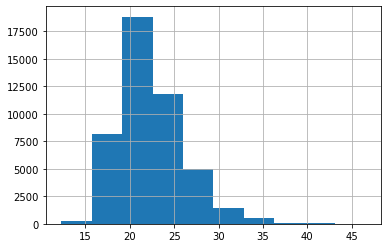

In [51]:
df_complet['niveau_vie_median_milliers'].hist()

In [29]:
df_accident=df.copy()

In [30]:
tout_quanti(df_accident)
tri_taille(df_accident)
df_accident['Constante']=1
var_quanti=var_quanti_autre+['Pratique_courante']+['Pratique_loisir']+tte_raison+tte_ville+tt_transport+["pourcent_accident"]+['marche_urbaine']+tt_age+['niveau_vie_median_milliers']+['malvoyant_val']
      
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail' pas à mettre avec Pratique_courante ou Pratique_Marche
var_quanti_marche=var_quanti_autre
#'Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre'+tte_ville+tte_raison +['marche_urbaine']
#var_quanti_autre+tt_transport+['Age']+['Pratique_loisir']['Pratique_courante']['Constante'],


In [31]:
init=df_accident.shape
for i in var_quanti:
    df_accident=df_accident[df_accident[i].notna()]#
print(init,df_accident.shape, "perte=", init[0]-df_accident.shape[0])


(46875, 169) (46329, 169) perte= 546


In [55]:

var_quanti=var_quanti_autre+['Pratique_courante']+['Pratique_loisir']+tte_raison+tt_transport+['marche_urbaine']+tt_age+['malvoyant_val']+['niveau_vie_median_milliers']+tte_ville+["pourcent_accident"]
result = discrete_model.Logit(df_accident['Resume_condition_marche'], df_accident[var_quanti] )
res=result.fit(maxiter=200, cov='abou')

res
#display(res.summary())
#pd.DataFrame(res.summary())
#.to_csv(r'C:\Users\sylva\OneDrive\Bureau\regression_resume.csv', index=False, sep=';')
#df_reg = pd.concat((res.params, res.tvalues), axis=1)
#df_reg
#
res.summary()

Optimization terminated successfully.
         Current function value: 0.668110
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Resume_condition_marche   No. Observations:                46329
Model:                               Logit   Df Residuals:                    46299
Method:                                MLE   Df Model:                           29
Date:                     Tue, 24 Aug 2021   Pseudo R-squ.:                 0.03161
Time:                             09:25:48   Log-Likelihood:                -30953.
converged:                            True   LL-Null:                       -31963.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.6621      0.086     -7.734      0.000      -0.830      -0.494
Sexe                           0.0208      0.019      1.073      0.283      -0.017       0.059
Membre_marche                  0.2382      0.025      9.628      0.000       0.190       0.287
Membre_pieton                 -0.3750      0.057     -6.524      0.000      -0.488      -0.262
Transport                     -0.0839      0.023     -3.619      0.000      -0.129      -0.038
Pratique_courante              0.0947      0.034      2.762      0.006       0.027       0.162
Pratique_loisir                0.0129      0.024      0.540      0.590      -0.034       0.060
Courses                       -0.0555      0.028     -1.967      0.049      -0.111      -0.000
Ecole_autre                   -0.2713      0.030     -9.124      0.000      -0.330      -0.213
Promenade                      0.1791      0.023      7.752      0.000       0.134       0.224
Vers_loisirs                   0.0676      0.024      2.759      0.006       0.020       0.116
Sport                          0.1082      0.024      4.501      0.000       0.061       0.155
Travail                        0.0174      0.028      0.617      0.537      -0.038       0.073
Cycliste                      -0.0028      0.027     -0.103      0.918      -0.056       0.050
Transport_commun               0.1293      0.042      3.094      0.002       0.047       0.211
Vehicule_motorise              0.1159      0.028      4.113      0.000       0.061       0.171
Velo_electrique                0.0347      0.055      0.632      0.528      -0.073       0.142
Mobilite_reduite              -0.4588      0.101     -4.559      0.000      -0.656      -0.262
marche_urbaine                -0.2098      0.026     -8.159      0.000      -0.260      -0.159
Moins_26                       0.3642      0.055      6.666      0.000       0.257       0.471
45_65                         -0.0864      0.024     -3.655      0.000      -0.133      -0.040
Plus_65                       -0.0426      0.030     -1.443      0.149      -0.100       0.015
malvoyant_val                 -0.1147      0.085     -1.344      0.179      -0.282       0.053
niveau_vie_median_milliers     0.0267      0.003     10.215      0.000       0.022       0.032
Petit_village                 -0.0141      0.036     -0.390      0.696      -0.085       0.056
Village                        0.0284      0.031      0.927      0.354      -0.032       0.088
Moyenne_ville                  0.0093      0.038      0.243      0.808      -0.066       0.085
Grande_ville                   0.1248      0.033      3.757      0.000       0.060       0.190
Tgrande_ville                 -0.1320      0.034     -3.870      0.000      -0.199      -0.065
pourcent_accident             -0.0922      0.014     -6.630      0.000      -0.119      -0.065
=============================================================

In [ ]:
results_text = res.summary().as_csv()
with open('reg2.csv','w') as f:
    f.write(results_text)
f.close()
#results_text.to_csv(r'C:\Users\sylva\OneDrive\Bureau\regression_resume.csv', index=False, sep=',')

TypeError: as_csv() got an unexpected keyword argument 'separator'

In [87]:
pd.read_csv('reg.csv')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 5, saw 5


In [54]:
var_quest

['Deplacement_a_pied',
 'Agencement_voirie',
 'conflits_pietons',
 'Conducteurs_respectent',
 'Circulation_vehicules_motorises',
 'Deplacements_pied_commune',
 'Marche_securite',
 'Securite_rues_services',
 'Securite_rues_residentielles',
 'Securite_rejoindre_communes_voisines',
 'Acces_pietons',
 'Marche_separe_circulation',
 'Marche_separe_autres_mobilites',
 'Traverse_carrefour',
 'Deplacements_enfants_personnes_agees',
 'Deplacements_enfants_ecole',
 'Pistes_cyclables',
 'Espaces_pietons',
 'Espaces_pietons_libres_empietements',
 'Espaces_pietons_entretenus',
 'Espaces_pietons_travaux',
 'Signaletique_specifique',
 'Amenagements_confort_marcheurs',
 'Trottoirs_eclaires',
 'Commune_ecoute_pietons',
 'Commune_effort_marche',
 'Situation_pietons',
 'Promotion_deplacement',
 'Stationnement_espaces_pietons',
 'Acces_transport_commun',
 'Signaletique',
 'Information',
 'Resume_condition_marche']

In [ ]:
logit(df_accident, 'Deplacements_pied_commune', var_quanti)

In [32]:
var_quanti=var_quanti_autre+['Pratique_courante']+['Pratique_loisir']+tte_raison+tte_ville+tt_transport+["pourcent_accident"]+['marche_urbaine']+tt_age+['75']+['niveau_vie_median_milliers']+['malvoyant_val']

for question in var_quest :
    df_quest=df_accident[df_accident[question].notna()]
    logit(df_quest, question, var_quanti)

Optimization terminated successfully.
         Current function value: 0.657671
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Deplacement_a_pied   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.02521
Time:                        08:08:56   Log-Likelihood:                -30469.
converged:                       True   LL-Null:                       -31257.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.5160      0.087     -5.912      0.000      -0.687      -0.345
Sexe                           0.0375      0.020      1.913      0.056      -0.001       0.076
Membre_marche                  0.2000      0.026      7.827      0.000       0.150       0.250
Membre_pieton                 -0.2930      0.056     -5.229      0.000      -0.403      -0.183
Transport                     -0.0724      0.023     -3.122      0.002      -0.118      -0.027
Pratique_courante              0.0878      0.035      2.524      0.012       0.020       0.156
Pratique_loisir                0.0796      0.024      3.322      0.001       0.033       0.127
Courses                       -0.0376      0.029     -1.313      0.189      -0.094       0.019
Ecole_autre                   -0.1867      0.030     -6.200      0.000      -0.246      -0.128
Promenade                      0.2272      0.023      9.752      0.000       0.182       0.273
Vers_loisirs                   0.0820      0.025      3.323      0.001       0.034       0.130
Sport                          0.1257      0.024      5.196      0.000       0.078       0.173
Travail                        0.0585      0.029      2.042      0.041       0.002       0.115
Petit_village                  0.1410      0.037      3.845      0.000       0.069       0.213
Village                        0.0733      0.031      2.376      0.018       0.013       0.134
Moyenne_ville                  0.0271      0.038      0.704      0.481      -0.048       0.102
Grande_ville                   0.1031      0.033      3.100      0.002       0.038       0.168
Tgrande_ville                 -0.0858      0.034     -2.535      0.011      -0.152      -0.019
Cycliste                      -0.0841      0.027     -3.094      0.002      -0.137      -0.031
Transport_commun               0.0279      0.042      0.669      0.504      -0.054       0.110
Vehicule_motorise              0.0549      0.029      1.915      0.055      -0.001       0.111
Velo_electrique                0.0305      0.055      0.551      0.582      -0.078       0.139
Mobilite_reduite              -0.4066      0.097     -4.205      0.000      -0.596      -0.217
pourcent_accident             -0.1014      0.014     -7.308      0.000      -0.129      -0.074
marche_urbaine                -0.2645      0.026    -10.043      0.000      -0.316      -0.213
Moins_26                       0.3037      0.056      5.452      0.000       0.195       0.413
45_65                         -0.0031      0.025     -0.121      0.904      -0.053       0.046
Plus_65                        0.0248      0.032      0.769      0.442      -0.038       0.088
75                             0.0613      0.053      1.157      0.247      -0.043       0.165
niveau_vie_median_milliers     0.0273      0.003     10.282      0.000       0.022       0.032
malvoyant_val                 -0.1245      0.085     -1.465      0.143      -0.291       0.042
===========

Optimization terminated successfully.
         Current function value: 0.668239
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Agencement_voirie   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.03168
Time:                        08:08:56   Log-Likelihood:                -30959.
converged:                       True   LL-Null:                       -31972.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.5869      0.086     -6.795      0.000      -0.756      -0.418
Sexe                           0.0006      0.019      0.032      0.975      -0.038       0.039
Membre_marche                  0.2626      0.025     10.456      0.000       0.213       0.312
Membre_pieton                 -0.4140      0.058     -7.157      0.000      -0.527      -0.301
Transport                     -0.0641      0.023     -2.765      0.006      -0.110      -0.019
Pratique_courante              0.0523      0.034      1.526      0.127      -0.015       0.119
Pratique_loisir                0.0194      0.024      0.809      0.418      -0.028       0.066
Courses                       -0.0621      0.028     -2.201      0.028      -0.117      -0.007
Ecole_autre                   -0.2819      0.030     -9.285      0.000      -0.341      -0.222
Promenade                      0.1465      0.023      6.323      0.000       0.101       0.192
Vers_loisirs                   0.0538      0.025      2.196      0.028       0.006       0.102
Sport                          0.1116      0.024      4.640      0.000       0.064       0.159
Travail                        0.0104      0.029      0.362      0.717      -0.046       0.067
Petit_village                 -0.0924      0.036     -2.572      0.010      -0.163      -0.022
Village                       -0.0256      0.031     -0.838      0.402      -0.086       0.034
Moyenne_ville                  0.0370      0.038      0.965      0.334      -0.038       0.112
Grande_ville                   0.1205      0.033      3.628      0.000       0.055       0.186
Tgrande_ville                 -0.1466      0.034     -4.329      0.000      -0.213      -0.080
Cycliste                      -0.0832      0.027     -3.054      0.002      -0.137      -0.030
Transport_commun               0.1067      0.042      2.556      0.011       0.025       0.189
Vehicule_motorise              0.0717      0.028      2.540      0.011       0.016       0.127
Velo_electrique               -0.0203      0.055     -0.369      0.712      -0.128       0.088
Mobilite_reduite              -0.5367      0.101     -5.294      0.000      -0.735      -0.338
pourcent_accident             -0.0687      0.013     -5.318      0.000      -0.094      -0.043
marche_urbaine                -0.2036      0.026     -7.908      0.000      -0.254      -0.153
Moins_26                       0.3476      0.055      6.337      0.000       0.240       0.455
45_65                          0.0138      0.025      0.545      0.586      -0.036       0.063
Plus_65                        0.0499      0.032      1.556      0.120      -0.013       0.113
75                             0.0883      0.052      1.687      0.092      -0.014       0.191
niveau_vie_median_milliers     0.0244      0.003      9.341      0.000       0.019       0.030
malvoyant_val                 -0.1533      0.085     -1.793      0.073      -0.321       0.014
===========

Optimization terminated successfully.
         Current function value: 0.628317
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       conflits_pietons   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.08723
Time:                        08:08:57   Log-Likelihood:                -29109.
converged:                       True   LL-Null:                       -31891.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                      0.4533      0.089      5.102      0.000       0.279       0.627
Sexe                          -0.0500      0.020     -2.501      0.012      -0.089      -0.011
Membre_marche                  0.2538      0.026      9.760      0.000       0.203       0.305
Membre_pieton                 -0.1374      0.057     -2.399      0.016      -0.250      -0.025
Transport                     -0.1018      0.024     -4.311      0.000      -0.148      -0.056
Pratique_courante             -0.0662      0.036     -1.850      0.064      -0.136       0.004
Pratique_loisir               -0.0689      0.025     -2.805      0.005      -0.117      -0.021
Courses                       -0.0160      0.029     -0.546      0.585      -0.073       0.041
Ecole_autre                   -0.1110      0.031     -3.605      0.000      -0.171      -0.051
Promenade                      0.1014      0.024      4.259      0.000       0.055       0.148
Vers_loisirs                   0.0205      0.025      0.814      0.415      -0.029       0.070
Sport                          0.0640      0.025      2.590      0.010       0.016       0.112
Travail                       -0.0765      0.029     -2.620      0.009      -0.134      -0.019
Petit_village                  0.4869      0.038     12.972      0.000       0.413       0.561
Village                        0.2447      0.031      7.903      0.000       0.184       0.305
Moyenne_ville                 -0.1539      0.038     -4.028      0.000      -0.229      -0.079
Grande_ville                  -0.3592      0.033    -10.820      0.000      -0.424      -0.294
Tgrande_ville                 -0.7580      0.034    -22.012      0.000      -0.825      -0.690
Cycliste                       0.1613      0.028      5.805      0.000       0.107       0.216
Transport_commun               0.0613      0.043      1.428      0.153      -0.023       0.145
Vehicule_motorise              0.0841      0.029      2.880      0.004       0.027       0.141
Velo_electrique                0.1239      0.056      2.200      0.028       0.013       0.234
Mobilite_reduite              -0.3311      0.099     -3.332      0.001      -0.526      -0.136
pourcent_accident             -0.0825      0.014     -6.102      0.000      -0.109      -0.056
marche_urbaine                -0.1743      0.027     -6.526      0.000      -0.227      -0.122
Moins_26                       0.1179      0.056      2.099      0.036       0.008       0.228
45_65                         -0.0581      0.026     -2.248      0.025      -0.109      -0.007
Plus_65                       -0.0274      0.033     -0.831      0.406      -0.092       0.037
75                            -0.0525      0.054     -0.971      0.331      -0.158       0.053
niveau_vie_median_milliers     0.0003      0.003      0.096      0.923      -0.005       0.005
malvoyant_val                 -0.1670      0.087     -1.921      0.055      -0.337       0.003
===========

Optimization terminated successfully.
         Current function value: 0.651328
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Conducteurs_respectent   No. Observations:                46329
Model:                              Logit   Df Residuals:                    46298
Method:                               MLE   Df Model:                           30
Date:                    Wed, 25 Aug 2021   Pseudo R-squ.:                 0.05158
Time:                            08:08:58   Log-Likelihood:                -30175.
converged:                           True   LL-Null:                       -31817.
Covariance Type:                nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.3942      0.087     -4.523      0.000      -0.565      -0.223
Sexe                           0.0485      0.020      2.464      0.014       0.010       0.087
Membre_marche                  0.2329      0.025      9.223      0.000       0.183       0.282
Membre_pieton                 -0.2366      0.058     -4.109      0.000      -0.349      -0.124
Transport                     -0.1276      0.023     -5.441      0.000      -0.174      -0.082
Pratique_courante             -0.0096      0.035     -0.278      0.781      -0.077       0.058
Pratique_loisir               -0.0426      0.024     -1.757      0.079      -0.090       0.005
Courses                       -0.0559      0.028     -1.961      0.050      -0.112   -1.68e-05
Ecole_autre                   -0.2419      0.031     -7.885      0.000      -0.302      -0.182
Promenade                      0.1251      0.023      5.354      0.000       0.079       0.171
Vers_loisirs                   0.0274      0.025      1.109      0.267      -0.021       0.076
Sport                          0.0870      0.024      3.585      0.000       0.039       0.135
Travail                       -0.0816      0.029     -2.816      0.005      -0.138      -0.025
Petit_village                  0.0891      0.036      2.458      0.014       0.018       0.160
Village                        0.1207      0.031      3.926      0.000       0.060       0.181
Moyenne_ville                 -0.0742      0.039     -1.924      0.054      -0.150       0.001
Grande_ville                  -0.0701      0.033     -2.094      0.036      -0.136      -0.004
Tgrande_ville                 -0.3065      0.035     -8.823      0.000      -0.375      -0.238
Cycliste                      -0.1622      0.028     -5.867      0.000      -0.216      -0.108
Transport_commun               0.1155      0.042      2.726      0.006       0.032       0.199
Vehicule_motorise              0.1427      0.028      5.022      0.000       0.087       0.198
Velo_electrique               -0.0511      0.056     -0.920      0.358      -0.160       0.058
Mobilite_reduite              -0.2412      0.098     -2.458      0.014      -0.434      -0.049
pourcent_accident             -0.1058      0.015     -7.259      0.000      -0.134      -0.077
marche_urbaine                -0.1215      0.026     -4.697      0.000      -0.172      -0.071
Moins_26                       0.2472      0.055      4.477      0.000       0.139       0.355
45_65                          0.0356      0.026      1.388      0.165      -0.015       0.086
Plus_65                        0.2024      0.032      6.259      0.000       0.139       0.266
75                             0.3505      0.053      6.627      0.000       0.247       0.454
niveau_vie_median_milliers     0.0168      0.003      6.384      0.000       0.012       0.022
malvoyant_val                 -0.0448      0.086     -0.523      0.601

Optimization terminated successfully.
         Current function value: 0.646775
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     Circulation_vehicules_motorises   No. Observations:                46329
Model:                                       Logit   Df Residuals:                    46298
Method:                                        MLE   Df Model:                           30
Date:                             Wed, 25 Aug 2021   Pseudo R-squ.:                 0.02399
Time:                                     08:08:58   Log-Likelihood:                -29964.
converged:                                    True   LL-Null:                       -30701.
Covariance Type:                         nonrobust   LLR p-value:                2.312e-291
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.2867      0.087     -3.288      0.001      -0.458      -0.116
Sexe                           0.0682      0.020      3.457      0.001       0.030       0.107
Membre_marche                  0.1870      0.025      7.414      0.000       0.138       0.236
Membre_pieton                 -0.3388      0.059     -5.697      0.000      -0.455      -0.222
Transport                     -0.1050      0.024     -4.451      0.000      -0.151      -0.059
Pratique_courante              0.0134      0.034      0.389      0.697      -0.054       0.081
Pratique_loisir               -0.0255      0.024     -1.046      0.296      -0.073       0.022
Courses                       -0.1104      0.028     -3.887      0.000      -0.166      -0.055
Ecole_autre                   -0.1944      0.031     -6.301      0.000      -0.255      -0.134
Promenade                      0.1024      0.023      4.375      0.000       0.056       0.148
Vers_loisirs                  -0.0119      0.025     -0.481      0.631      -0.060       0.037
Sport                          0.0425      0.024      1.749      0.080      -0.005       0.090
Travail                       -0.0379      0.029     -1.302      0.193      -0.095       0.019
Petit_village                  0.1379      0.036      3.825      0.000       0.067       0.209
Village                        0.0759      0.031      2.472      0.013       0.016       0.136
Moyenne_ville                 -0.0964      0.039     -2.487      0.013      -0.172      -0.020
Grande_ville                  -0.0531      0.034     -1.581      0.114      -0.119       0.013
Tgrande_ville                 -0.3337      0.035     -9.533      0.000      -0.402      -0.265
Cycliste                      -0.2491      0.028     -8.897      0.000      -0.304      -0.194
Transport_commun               0.1003      0.043      2.358      0.018       0.017       0.184
Vehicule_motorise              0.1455      0.028      5.148      0.000       0.090       0.201
Velo_electrique               -0.0828      0.056     -1.484      0.138      -0.192       0.027
Mobilite_reduite              -0.1400      0.098     -1.429      0.153      -0.332       0.052
pourcent_accident             -0.0899      0.014     -6.257      0.000      -0.118      -0.062
marche_urbaine                -0.1120      0.026     -4.346      0.000      -0.162      -0.061
Moins_26                       0.3091      0.055      5.583      0.000       0.201       0.418
45_65                          0.0729      0.026      2.822      0.005       0.022       0.124
Plus_65                        0.1675      0.032      5.155      0.000       0.104       0.231
75                             0.2535      0.053      4.816      0.000       0.150       0.357
niveau_vie_median_milliers     0.0077      0.003      2.919      0.004       0.003  

Optimization terminated successfully.
         Current function value: 0.678733
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Deplacements_pied_commune   No. Observations:                46329
Model:                                 Logit   Df Residuals:                    46298
Method:                                  MLE   Df Model:                           30
Date:                       Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01613
Time:                               08:08:59   Log-Likelihood:                -31445.
converged:                              True   LL-Null:                       -31961.
Covariance Type:                   nonrobust   LLR p-value:                1.284e-197
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -1.2112      0.086    -14.034      0.000      -1.380      -1.042
Sexe                           0.0160      0.019      0.828      0.408      -0.022       0.054
Membre_marche                 -0.0051      0.025     -0.205      0.838      -0.054       0.044
Membre_pieton                 -0.0090      0.056     -0.162      0.872      -0.118       0.100
Transport                      0.0165      0.023      0.718      0.473      -0.029       0.062
Pratique_courante              0.2255      0.034      6.545      0.000       0.158       0.293
Pratique_loisir                0.0638      0.024      2.677      0.007       0.017       0.110
Courses                        0.0874      0.028      3.108      0.002       0.032       0.143
Ecole_autre                    0.0780      0.030      2.607      0.009       0.019       0.137
Promenade                      0.0574      0.023      2.490      0.013       0.012       0.103
Vers_loisirs                   0.0701      0.024      2.873      0.004       0.022       0.118
Sport                         -0.0360      0.024     -1.501      0.133      -0.083       0.011
Travail                        0.0407      0.028      1.431      0.152      -0.015       0.096
Petit_village                  0.0948      0.036      2.650      0.008       0.025       0.165
Village                        0.0165      0.030      0.542      0.588      -0.043       0.076
Moyenne_ville                  0.0468      0.038      1.224      0.221      -0.028       0.122
Grande_ville                   0.1437      0.033      4.356      0.000       0.079       0.208
Tgrande_ville                  0.2222      0.034      6.632      0.000       0.157       0.288
Cycliste                      -0.0526      0.027     -1.950      0.051      -0.106       0.000
Transport_commun              -0.0064      0.042     -0.154      0.878      -0.088       0.075
Vehicule_motorise             -0.0903      0.028     -3.208      0.001      -0.146      -0.035
Velo_electrique               -0.0856      0.055     -1.564      0.118      -0.193       0.022
Mobilite_reduite              -0.0267      0.096     -0.279      0.780      -0.214       0.161
pourcent_accident              0.0742      0.013      5.684      0.000       0.049       0.100
marche_urbaine                 0.0129      0.026      0.503      0.615      -0.037       0.063
Moins_26                       0.1116      0.055      2.037      0.042       0.004       0.219
45_65                         -0.1609      0.025     -6.407      0.000      -0.210      -0.112
Plus_65                       -0.1367      0.032     -4.289      0.000      -0.199      -0.074
75                            -0.1340      0.052     -2.577      0.010      -0.236      -0.032
niveau_vie_median_milliers     0.0315      0.003     12.107      0.000       0.026       0.037
malvoyant_val                  0.0742      

Optimization terminated successfully.
         Current function value: 0.656935
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Marche_securite   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:               -0.001167
Time:                        08:08:59   Log-Likelihood:                -30435.
converged:                       True   LL-Null:                       -30400.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.2053      0.087     -2.356      0.018      -0.376      -0.035
Sexe                           0.0328      0.020      1.676      0.094      -0.006       0.071
Membre_marche                  0.2208      0.026      8.628      0.000       0.171       0.271
Membre_pieton                 -0.3263      0.056     -5.850      0.000      -0.436      -0.217
Transport                     -0.0849      0.023     -3.663      0.000      -0.130      -0.039
Pratique_courante              0.0889      0.035      2.555      0.011       0.021       0.157
Pratique_loisir               -0.0406      0.024     -1.689      0.091      -0.088       0.007
Courses                       -0.0146      0.029     -0.511      0.609      -0.071       0.041
Ecole_autre                   -0.2652      0.030     -8.826      0.000      -0.324      -0.206
Promenade                      0.1558      0.023      6.686      0.000       0.110       0.202
Vers_loisirs                   0.0535      0.025      2.167      0.030       0.005       0.102
Sport                          0.0871      0.024      3.598      0.000       0.040       0.135
Travail                       -0.0003      0.029     -0.011      0.991      -0.056       0.056
Petit_village                  0.0212      0.036      0.583      0.560      -0.050       0.093
Village                        0.0471      0.031      1.528      0.127      -0.013       0.107
Moyenne_ville                 -0.0054      0.039     -0.140      0.889      -0.081       0.070
Grande_ville                   0.0019      0.033      0.056      0.955      -0.063       0.067
Tgrande_ville                 -0.2138      0.033     -6.398      0.000      -0.279      -0.148
Cycliste                       0.0081      0.027      0.299      0.765      -0.045       0.061
Transport_commun               0.1227      0.042      2.934      0.003       0.041       0.205
Vehicule_motorise              0.1086      0.029      3.782      0.000       0.052       0.165
Velo_electrique                0.0544      0.055      0.984      0.325      -0.054       0.163
Mobilite_reduite              -0.4736      0.097     -4.895      0.000      -0.663      -0.284
pourcent_accident             -0.0519      0.012     -4.318      0.000      -0.075      -0.028
marche_urbaine                -0.1730      0.026     -6.571      0.000      -0.225      -0.121
Moins_26                       0.2619      0.056      4.681      0.000       0.152       0.372
45_65                         -0.0358      0.025     -1.418      0.156      -0.085       0.014
Plus_65                       -0.0187      0.032     -0.579      0.563      -0.082       0.045
75                             0.0476      0.053      0.897      0.370      -0.056       0.152
niveau_vie_median_milliers     0.0218      0.003      8.256      0.000       0.017       0.027
malvoyant_val                 -0.2456      0.085     -2.899      0.004      -0.412      -0.080
===========

Optimization terminated successfully.
         Current function value: 0.626318
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Securite_rues_services   No. Observations:                46329
Model:                              Logit   Df Residuals:                    46298
Method:                               MLE   Df Model:                           30
Date:                    Wed, 25 Aug 2021   Pseudo R-squ.:                -0.05034
Time:                            08:09:00   Log-Likelihood:                -29017.
converged:                           True   LL-Null:                       -27626.
Covariance Type:                nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                      0.3306      0.089      3.729      0.000       0.157       0.504
Sexe                           0.0165      0.020      0.826      0.409      -0.023       0.056
Membre_marche                  0.2293      0.026      8.764      0.000       0.178       0.281
Membre_pieton                 -0.3612      0.056     -6.483      0.000      -0.470      -0.252
Transport                     -0.1197      0.024     -5.078      0.000      -0.166      -0.074
Pratique_courante              0.0472      0.036      1.324      0.186      -0.023       0.117
Pratique_loisir               -0.0483      0.025     -1.966      0.049      -0.096      -0.000
Courses                       -0.0026      0.029     -0.089      0.929      -0.060       0.055
Ecole_autre                   -0.2609      0.030     -8.584      0.000      -0.320      -0.201
Promenade                      0.1845      0.024      7.777      0.000       0.138       0.231
Vers_loisirs                   0.0615      0.025      2.440      0.015       0.012       0.111
Sport                          0.0973      0.025      3.942      0.000       0.049       0.146
Travail                        0.0358      0.029      1.228      0.219      -0.021       0.093
Petit_village                 -0.1251      0.037     -3.387      0.001      -0.198      -0.053
Village                       -0.0742      0.031     -2.366      0.018      -0.136      -0.013
Moyenne_ville                  0.0902      0.040      2.274      0.023       0.012       0.168
Grande_ville                   0.1883      0.034      5.480      0.000       0.121       0.256
Tgrande_ville                 -0.0790      0.034     -2.327      0.020      -0.146      -0.012
Cycliste                       0.0182      0.028      0.655      0.512      -0.036       0.073
Transport_commun               0.1472      0.043      3.430      0.001       0.063       0.231
Vehicule_motorise              0.1309      0.029      4.451      0.000       0.073       0.188
Velo_electrique                0.0535      0.056      0.951      0.342      -0.057       0.164
Mobilite_reduite              -0.4583      0.096     -4.788      0.000      -0.646      -0.271
pourcent_accident             -0.0585      0.012     -4.887      0.000      -0.082      -0.035
marche_urbaine                -0.1633      0.027     -6.067      0.000      -0.216      -0.111
Moins_26                       0.3437      0.060      5.771      0.000       0.227       0.460
45_65                         -0.1389      0.026     -5.389      0.000      -0.189      -0.088
Plus_65                       -0.0979      0.033     -2.969      0.003      -0.162      -0.033
75                            -0.0333      0.054     -0.614      0.539      -0.140       0.073
niveau_vie_median_milliers     0.0110      0.003      4.111      0.000       0.006       0.016
malvoyant_val                 -0.2545      0.085     -2.990      0.003

Optimization terminated successfully.
         Current function value: 0.618624
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     Securite_rues_residentielles   No. Observations:                46329
Model:                                    Logit   Df Residuals:                    46298
Method:                                     MLE   Df Model:                           30
Date:                          Wed, 25 Aug 2021   Pseudo R-squ.:                -0.03922
Time:                                  08:09:01   Log-Likelihood:                -28660.
converged:                                 True   LL-Null:                       -27579.
Covariance Type:                      nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.1556      0.090     -1.736      0.083      -0.331       0.020
Sexe                           0.0923      0.020      4.598      0.000       0.053       0.132
Membre_marche                  0.2101      0.026      7.929      0.000       0.158       0.262
Membre_pieton                 -0.3676      0.056     -6.573      0.000      -0.477      -0.258
Transport                     -0.0486      0.024     -2.055      0.040      -0.095      -0.002
Pratique_courante              0.0562      0.036      1.559      0.119      -0.014       0.127
Pratique_loisir               -0.0264      0.025     -1.073      0.283      -0.075       0.022
Courses                       -0.0158      0.029     -0.536      0.592      -0.073       0.042
Ecole_autre                   -0.2710      0.030     -8.900      0.000      -0.331      -0.211
Promenade                      0.1580      0.024      6.614      0.000       0.111       0.205
Vers_loisirs                   0.0506      0.025      1.998      0.046       0.001       0.100
Sport                          0.1207      0.025      4.867      0.000       0.072       0.169
Travail                       -0.0014      0.029     -0.047      0.962      -0.059       0.056
Petit_village                  0.0692      0.038      1.840      0.066      -0.005       0.143
Village                        0.0882      0.032      2.786      0.005       0.026       0.150
Moyenne_ville                 -0.0426      0.039     -1.084      0.278      -0.120       0.034
Grande_ville                  -0.0097      0.034     -0.288      0.774      -0.076       0.057
Tgrande_ville                 -0.1820      0.034     -5.381      0.000      -0.248      -0.116
Cycliste                      -0.0563      0.028     -2.041      0.041      -0.110      -0.002
Transport_commun               0.1325      0.043      3.094      0.002       0.049       0.216
Vehicule_motorise              0.1400      0.030      4.698      0.000       0.082       0.198
Velo_electrique               -0.0087      0.056     -0.155      0.877      -0.119       0.102
Mobilite_reduite              -0.4711      0.096     -4.916      0.000      -0.659      -0.283
pourcent_accident             -0.0271      0.012     -2.310      0.021      -0.050      -0.004
marche_urbaine                -0.2164      0.027     -7.897      0.000      -0.270      -0.163
Moins_26                       0.3830      0.058      6.574      0.000       0.269       0.497
45_65                          0.0198      0.026      0.773      0.440      -0.030       0.070
Plus_65                        0.0781      0.033      2.363      0.018       0.013       0.143
75                             0.1397      0.055      2.545      0.011       0.032       0.247
niveau_vie_median_milliers     0.0263      0.003      9.640      0.000       0.021       0.032
malvoyant_val   

Optimization terminated successfully.
         Current function value: 0.648354
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    Logit Regression Results                                    
================================================================================================
Dep. Variable:     Securite_rejoindre_communes_voisines   No. Observations:                46329
Model:                                            Logit   Df Residuals:                    46298
Method:                                             MLE   Df Model:                           30
Date:                                  Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01682
Time:                                          08:09:01   Log-Likelihood:                -30038.
converged:                                         True   LL-Null:                       -30551.
Covariance Type:                              nonrobust   LLR p-value:                7.750e-197
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -1.1034      0.087    -12.628      0.000      -1.275      -0.932
Sexe                           0.0802      0.020      4.065      0.000       0.042       0.119
Membre_marche                  0.2899      0.025     11.513      0.000       0.241       0.339
Membre_pieton                 -0.4409      0.060     -7.312      0.000      -0.559      -0.323
Transport                     -0.0116      0.023     -0.495      0.621      -0.058       0.034
Pratique_courante              0.1399      0.035      4.012      0.000       0.072       0.208
Pratique_loisir                0.0367      0.024      1.501      0.133      -0.011       0.085
Courses                       -0.1035      0.029     -3.632      0.000      -0.159      -0.048
Ecole_autre                   -0.2210      0.031     -7.121      0.000      -0.282      -0.160
Promenade                      0.1032      0.023      4.399      0.000       0.057       0.149
Vers_loisirs                  -0.0027      0.025     -0.109      0.913      -0.051       0.046
Sport                          0.0388      0.024      1.590      0.112      -0.009       0.087
Travail                       -0.0510      0.029     -1.752      0.080      -0.108       0.006
Petit_village                 -0.2877      0.036     -7.948      0.000      -0.359      -0.217
Village                       -0.1953      0.031     -6.327      0.000      -0.256      -0.135
Moyenne_ville                  0.0478      0.039      1.236      0.217      -0.028       0.124
Grande_ville                   0.0571      0.033      1.705      0.088      -0.009       0.123
Tgrande_ville                 -0.2939      0.034     -8.586      0.000      -0.361      -0.227
Cycliste                      -0.1964      0.028     -7.041      0.000      -0.251      -0.142
Transport_commun               0.0698      0.042      1.657      0.098      -0.013       0.152
Vehicule_motorise             -0.0875      0.029     -3.062      0.002      -0.143      -0.031
Velo_electrique               -0.1688      0.056     -2.989      0.003      -0.279      -0.058
Mobilite_reduite              -0.2386      0.099     -2.411      0.016      -0.433      -0.045
pourcent_accident              0.0263      0.012      2.186      0.029       0.003       0.050
marche_urbaine                -0.1697      0.026     -6.541      0.000      -0.221      -0.119
Moins_26                       0.2493      0.055      4.502      0.000       0.141       0.358
45_65                          0.1061      0.026      4.096      0.000       0.055       0.157
Plus_65                        0.2644      0.032      8.148      0.000       0.201       0.328
75                             0.3713      0.052      7.077      0.000       0.268       0.474
niveau_vie_median_milliers     0.0333  

Optimization terminated successfully.
         Current function value: 0.657889
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Acces_pietons   No. Observations:                39917
Model:                          Logit   Df Residuals:                    39886
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                -0.02905
Time:                        08:09:02   Log-Likelihood:                -26261.
converged:                       True   LL-Null:                       -25520.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.0020      0.094     -0.021      0.983      -0.187       0.183
Sexe                          -0.0143      0.021     -0.678      0.498      -0.056       0.027
Membre_marche                  0.1924      0.028      6.806      0.000       0.137       0.248
Membre_pieton                 -0.3174      0.058     -5.430      0.000      -0.432      -0.203
Transport                     -0.0583      0.024     -2.408      0.016      -0.106      -0.011
Pratique_courante              0.0913      0.039      2.334      0.020       0.015       0.168
Pratique_loisir               -0.0269      0.026     -1.046      0.296      -0.077       0.024
Courses                        0.0098      0.031      0.313      0.755      -0.052       0.072
Ecole_autre                   -0.1768      0.032     -5.507      0.000      -0.240      -0.114
Promenade                      0.1335      0.025      5.241      0.000       0.084       0.183
Vers_loisirs                   0.0271      0.027      1.008      0.314      -0.026       0.080
Sport                          0.0699      0.026      2.652      0.008       0.018       0.122
Travail                       -0.0341      0.030     -1.124      0.261      -0.094       0.025
Petit_village                 -0.1365      0.042     -3.287      0.001      -0.218      -0.055
Village                        0.0059      0.033      0.177      0.860      -0.060       0.071
Moyenne_ville                 -0.0961      0.040     -2.394      0.017      -0.175      -0.017
Grande_ville                   0.1733      0.035      4.939      0.000       0.105       0.242
Tgrande_ville                 -0.1137      0.035     -3.232      0.001      -0.183      -0.045
Cycliste                      -0.0237      0.029     -0.822      0.411      -0.080       0.033
Transport_commun               0.0837      0.043      1.954      0.051      -0.000       0.168
Vehicule_motorise              0.0249      0.032      0.783      0.433      -0.037       0.087
Velo_electrique               -0.0281      0.058     -0.482      0.630      -0.143       0.086
Mobilite_reduite              -0.2700      0.103     -2.616      0.009      -0.472      -0.068
pourcent_accident             -0.0766      0.014     -5.367      0.000      -0.105      -0.049
marche_urbaine                -0.0827      0.029     -2.824      0.005      -0.140      -0.025
Moins_26                       0.1642      0.058      2.814      0.005       0.050       0.279
45_65                         -0.0686      0.027     -2.578      0.010      -0.121      -0.016
Plus_65                       -0.0013      0.035     -0.038      0.970      -0.070       0.067
75                             0.0734      0.059      1.236      0.217      -0.043       0.190
niveau_vie_median_milliers     0.0157      0.003      5.605      0.000       0.010       0.021
malvoyant_val                 -0.1973      0.091     -2.174      0.030      -0.375      -0.019
===========

Optimization terminated successfully.
         Current function value: 0.383276
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Marche_separe_circulation   No. Observations:                46329
Model:                                 Logit   Df Residuals:                    46298
Method:                                  MLE   Df Model:                           30
Date:                       Wed, 25 Aug 2021   Pseudo R-squ.:                 -0.3749
Time:                               08:09:03   Log-Likelihood:                -17757.
converged:                              True   LL-Null:                       -12915.
Covariance Type:                   nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                      0.8459      0.108      7.820      0.000       0.634       1.058
Sexe                          -0.0047      0.025     -0.190      0.849      -0.053       0.044
Membre_marche                 -0.0758      0.031     -2.453      0.014      -0.136      -0.015
Membre_pieton                  0.1322      0.076      1.747      0.081      -0.016       0.280
Transport                     -0.0139      0.030     -0.469      0.639      -0.072       0.044
Pratique_courante             -0.0044      0.042     -0.105      0.916      -0.087       0.078
Pratique_loisir               -0.0003      0.031     -0.011      0.991      -0.060       0.059
Courses                        0.1675      0.034      4.868      0.000       0.100       0.235
Ecole_autre                    0.0456      0.038      1.190      0.234      -0.029       0.121
Promenade                      0.0963      0.029      3.361      0.001       0.040       0.152
Vers_loisirs                   0.1031      0.031      3.376      0.001       0.043       0.163
Sport                          0.1177      0.030      3.936      0.000       0.059       0.176
Travail                        0.0803      0.036      2.207      0.027       0.009       0.152
Petit_village                 -0.2585      0.043     -5.955      0.000      -0.344      -0.173
Village                       -0.1397      0.038     -3.682      0.000      -0.214      -0.065
Moyenne_ville                  0.0065      0.049      0.133      0.894      -0.089       0.102
Grande_ville                   0.0880      0.043      2.060      0.039       0.004       0.172
Tgrande_ville                  0.2299      0.044      5.258      0.000       0.144       0.316
Cycliste                       0.2430      0.037      6.658      0.000       0.171       0.315
Transport_commun               0.0153      0.054      0.282      0.778      -0.091       0.122
Vehicule_motorise             -0.0642      0.034     -1.872      0.061      -0.131       0.003
Velo_electrique                0.0351      0.070      0.503      0.615      -0.102       0.172
Mobilite_reduite              -0.0888      0.116     -0.766      0.444      -0.316       0.139
pourcent_accident             -0.0437      0.013     -3.323      0.001      -0.069      -0.018
marche_urbaine                 0.0278      0.032      0.879      0.379      -0.034       0.090
Moins_26                      -0.1108      0.072     -1.536      0.125      -0.252       0.031
45_65                         -0.1869      0.033     -5.663      0.000      -0.252      -0.122
Plus_65                       -0.2174      0.041     -5.315      0.000      -0.298      -0.137
75                            -0.2312      0.065     -3.570      0.000      -0.358      -0.104
niveau_vie_median_milliers     0.0210      0.003      6.235      0.000       0.014       0.028
malvoyant_val                 -0.1122      

Optimization terminated successfully.
         Current function value: 0.533337
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     Marche_separe_autres_mobilites   No. Observations:                46329
Model:                                      Logit   Df Residuals:                    46298
Method:                                       MLE   Df Model:                           30
Date:                            Wed, 25 Aug 2021   Pseudo R-squ.:                 -0.1501
Time:                                    08:09:03   Log-Likelihood:                -24709.
converged:                                   True   LL-Null:                       -21484.
Covariance Type:                        nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                      0.1856      0.095      1.960      0.050   -3.88e-05       0.371
Sexe                           0.1210      0.021      5.656      0.000       0.079       0.163
Membre_marche                  0.0089      0.028      0.316      0.752      -0.046       0.064
Membre_pieton                 -0.0403      0.061     -0.656      0.512      -0.160       0.080
Transport                      0.0083      0.026      0.321      0.749      -0.042       0.059
Pratique_courante              0.0554      0.037      1.513      0.130      -0.016       0.127
Pratique_loisir                0.0129      0.026      0.496      0.620      -0.038       0.064
Courses                        0.0516      0.030      1.693      0.090      -0.008       0.111
Ecole_autre                   -0.1508      0.032     -4.660      0.000      -0.214      -0.087
Promenade                      0.0309      0.025      1.216      0.224      -0.019       0.081
Vers_loisirs                   0.0207      0.027      0.768      0.443      -0.032       0.074
Sport                          0.0187      0.027      0.706      0.480      -0.033       0.071
Travail                        0.0041      0.031      0.131      0.895      -0.057       0.066
Petit_village                 -0.4328      0.038    -11.293      0.000      -0.508      -0.358
Village                       -0.2267      0.033     -6.839      0.000      -0.292      -0.162
Moyenne_ville                  0.0337      0.043      0.792      0.428      -0.050       0.117
Grande_ville                   0.1722      0.037      4.634      0.000       0.099       0.245
Tgrande_ville                  0.3084      0.038      8.108      0.000       0.234       0.383
Cycliste                      -0.1791      0.029     -6.090      0.000      -0.237      -0.121
Transport_commun              -0.0274      0.048     -0.577      0.564      -0.121       0.066
Vehicule_motorise             -0.0560      0.031     -1.833      0.067      -0.116       0.004
Velo_electrique               -0.1635      0.059     -2.779      0.005      -0.279      -0.048
Mobilite_reduite               0.1025      0.112      0.917      0.359      -0.116       0.321
pourcent_accident              0.0103      0.013      0.767      0.443      -0.016       0.037
marche_urbaine                 0.0341      0.028      1.217      0.224      -0.021       0.089
Moins_26                      -0.2189      0.058     -3.785      0.000      -0.332      -0.106
45_65                          0.1668      0.028      6.057      0.000       0.113       0.221
Plus_65                        0.3183      0.036      8.943      0.000       0.249       0.388
75                             0.4138      0.061      6.832      0.000       0.295       0.532
niveau_vie_median_milliers     0.0203      0.003      7.000      0.000       0.015       0.02

Optimization terminated successfully.
         Current function value: 0.669294
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Traverse_carrefour   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01823
Time:                        08:09:04   Log-Likelihood:                -31008.
converged:                       True   LL-Null:                       -31584.
Covariance Type:            nonrobust   LLR p-value:                4.053e-223
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.5613      0.086     -6.514      0.000      -0.730      -0.392
Sexe                           0.0314      0.019      1.614      0.107      -0.007       0.070
Membre_marche                  0.1972      0.025      7.875      0.000       0.148       0.246
Membre_pieton                 -0.3048      0.057     -5.312      0.000      -0.417      -0.192
Transport                     -0.0725      0.023     -3.129      0.002      -0.118      -0.027
Pratique_courante              0.0707      0.034      2.071      0.038       0.004       0.138
Pratique_loisir               -0.0413      0.024     -1.724      0.085      -0.088       0.006
Courses                       -0.0528      0.028     -1.876      0.061      -0.108       0.002
Ecole_autre                   -0.2631      0.030     -8.671      0.000      -0.323      -0.204
Promenade                      0.0928      0.023      4.013      0.000       0.047       0.138
Vers_loisirs                   0.0145      0.024      0.592      0.554      -0.033       0.062
Sport                          0.0385      0.024      1.600      0.110      -0.009       0.086
Travail                       -0.0621      0.029     -2.169      0.030      -0.118      -0.006
Petit_village                  0.0618      0.036      1.731      0.084      -0.008       0.132
Village                        0.0473      0.030      1.553      0.120      -0.012       0.107
Moyenne_ville                 -0.0550      0.038     -1.434      0.152      -0.130       0.020
Grande_ville                  -0.0291      0.033     -0.877      0.380      -0.094       0.036
Tgrande_ville                 -0.1779      0.034     -5.257      0.000      -0.244      -0.112
Cycliste                      -0.0972      0.027     -3.562      0.000      -0.151      -0.044
Transport_commun               0.0963      0.042      2.304      0.021       0.014       0.178
Vehicule_motorise              0.0635      0.028      2.258      0.024       0.008       0.119
Velo_electrique               -0.0436      0.055     -0.791      0.429      -0.151       0.064
Mobilite_reduite              -0.3990      0.100     -4.000      0.000      -0.595      -0.204
pourcent_accident             -0.0549      0.013     -4.302      0.000      -0.080      -0.030
marche_urbaine                -0.1012      0.026     -3.946      0.000      -0.151      -0.051
Moins_26                       0.1837      0.055      3.359      0.001       0.076       0.291
45_65                         -0.0456      0.025     -1.800      0.072      -0.095       0.004
Plus_65                        0.0497      0.032      1.551      0.121      -0.013       0.112
75                             0.1019      0.052      1.954      0.051      -0.000       0.204
niveau_vie_median_milliers     0.0230      0.003      8.828      0.000       0.018       0.028
malvoyant_val                 -0.1822      0.086     -2.126      0.033      -0.350      -0.014
===========

Optimization terminated successfully.
         Current function value: 0.634393
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    Logit Regression Results                                    
================================================================================================
Dep. Variable:     Deplacements_enfants_personnes_agees   No. Observations:                46329
Model:                                            Logit   Df Residuals:                    46298
Method:                                             MLE   Df Model:                           30
Date:                                  Wed, 25 Aug 2021   Pseudo R-squ.:                -0.01108
Time:                                          08:09:05   Log-Likelihood:                -29391.
converged:                                         True   LL-Null:                       -29069.
Covariance Type:                              nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.7781      0.088     -8.851      0.000      -0.950      -0.606
Sexe                           0.0177      0.020      0.891      0.373      -0.021       0.057
Membre_marche                  0.2410      0.025      9.529      0.000       0.191       0.291
Membre_pieton                 -0.3476      0.060     -5.760      0.000      -0.466      -0.229
Transport                     -0.0539      0.024     -2.262      0.024      -0.101      -0.007
Pratique_courante              0.0770      0.035      2.223      0.026       0.009       0.145
Pratique_loisir               -0.0088      0.025     -0.357      0.721      -0.057       0.039
Courses                       -0.0920      0.029     -3.219      0.001      -0.148      -0.036
Ecole_autre                   -0.3107      0.031     -9.873      0.000      -0.372      -0.249
Promenade                      0.1266      0.024      5.365      0.000       0.080       0.173
Vers_loisirs                   0.0194      0.025      0.777      0.437      -0.030       0.068
Sport                          0.0677      0.025      2.761      0.006       0.020       0.116
Travail                       -0.0204      0.029     -0.691      0.490      -0.078       0.037
Petit_village                 -0.0215      0.036     -0.589      0.556      -0.093       0.050
Village                        0.0008      0.031      0.025      0.980      -0.060       0.062
Moyenne_ville                  0.0118      0.039      0.303      0.762      -0.065       0.088
Grande_ville                   0.0651      0.034      1.919      0.055      -0.001       0.132
Tgrande_ville                 -0.2679      0.036     -7.488      0.000      -0.338      -0.198
Cycliste                      -0.0749      0.028     -2.668      0.008      -0.130      -0.020
Transport_commun               0.1255      0.043      2.924      0.003       0.041       0.210
Vehicule_motorise              0.0775      0.028      2.721      0.007       0.022       0.133
Velo_electrique               -0.0391      0.057     -0.691      0.490      -0.150       0.072
Mobilite_reduite              -0.4961      0.106     -4.671      0.000      -0.704      -0.288
pourcent_accident             -0.1178      0.015     -7.608      0.000      -0.148      -0.087
marche_urbaine                -0.1740      0.026     -6.732      0.000      -0.225      -0.123
Moins_26                       0.3363      0.055      6.078      0.000       0.228       0.445
45_65                          0.0132      0.026      0.505      0.613      -0.038       0.064
Plus_65                        0.1104      0.033      3.374      0.001       0.046       0.175
75                             0.2111      0.053      3.997      0.000       0.108       0.315
niveau_vie_median_milliers     0.0226  

Optimization terminated successfully.
         Current function value: 0.645791
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Deplacements_enfants_ecole   No. Observations:                46329
Model:                                  Logit   Df Residuals:                    46298
Method:                                   MLE   Df Model:                           30
Date:                        Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01174
Time:                                08:09:05   Log-Likelihood:                -29919.
converged:                               True   LL-Null:                       -30274.
Covariance Type:                    nonrobust   LLR p-value:                3.051e-130
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.6656      0.087     -7.625      0.000      -0.837      -0.495
Sexe                           0.0061      0.020      0.308      0.758      -0.033       0.045
Membre_marche                  0.2135      0.025      8.476      0.000       0.164       0.263
Membre_pieton                 -0.3862      0.060     -6.461      0.000      -0.503      -0.269
Transport                     -0.0582      0.024     -2.467      0.014      -0.104      -0.012
Pratique_courante              0.0900      0.034      2.610      0.009       0.022       0.158
Pratique_loisir               -0.0110      0.024     -0.451      0.652      -0.059       0.037
Courses                       -0.0653      0.028     -2.294      0.022      -0.121      -0.010
Ecole_autre                   -0.4110      0.031    -13.143      0.000      -0.472      -0.350
Promenade                      0.1181      0.023      5.046      0.000       0.072       0.164
Vers_loisirs                   0.0180      0.025      0.728      0.467      -0.030       0.067
Sport                          0.0763      0.024      3.138      0.002       0.029       0.124
Travail                       -0.0262      0.029     -0.897      0.370      -0.083       0.031
Petit_village                 -0.0012      0.036     -0.032      0.974      -0.072       0.070
Village                        0.0347      0.031      1.124      0.261      -0.026       0.095
Moyenne_ville                 -0.0133      0.039     -0.343      0.731      -0.089       0.063
Grande_ville                   0.0160      0.034      0.474      0.635      -0.050       0.082
Tgrande_ville                 -0.2888      0.035     -8.217      0.000      -0.358      -0.220
Cycliste                      -0.1083      0.028     -3.888      0.000      -0.163      -0.054
Transport_commun               0.1152      0.043      2.709      0.007       0.032       0.199
Vehicule_motorise              0.0645      0.028      2.273      0.023       0.009       0.120
Velo_electrique               -0.0741      0.056     -1.317      0.188      -0.184       0.036
Mobilite_reduite              -0.2619      0.100     -2.617      0.009      -0.458      -0.066
pourcent_accident             -0.0955      0.015     -6.543      0.000      -0.124      -0.067
marche_urbaine                -0.1485      0.026     -5.759      0.000      -0.199      -0.098
Moins_26                       0.3408      0.055      6.192      0.000       0.233       0.449
45_65                          0.0016      0.026      0.064      0.949      -0.049       0.052
Plus_65                        0.0899      0.032      2.768      0.006       0.026       0.154
75                             0.1776      0.053      3.379      0.001       0.075       0.281
niveau_vie_median_milliers     0.0214      0.003      8.087      0.000       0.016       0.027
malvoyant_val                 -0.0

Optimization terminated successfully.
         Current function value: 0.678585
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Pistes_cyclables   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01013
Time:                        08:09:06   Log-Likelihood:                -31438.
converged:                       True   LL-Null:                       -31760.
Covariance Type:            nonrobust   LLR p-value:                3.302e-116
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.1671      0.086     -1.949      0.051      -0.335       0.001
Sexe                          -0.0611      0.019     -3.158      0.002      -0.099      -0.023
Membre_marche                  0.1016      0.025      4.062      0.000       0.053       0.151
Membre_pieton                 -0.1139      0.056     -2.037      0.042      -0.223      -0.004
Transport                     -0.0546      0.023     -2.369      0.018      -0.100      -0.009
Pratique_courante              0.0272      0.034      0.801      0.423      -0.039       0.094
Pratique_loisir               -0.0599      0.024     -2.521      0.012      -0.107      -0.013
Courses                        0.0300      0.028      1.072      0.284      -0.025       0.085
Ecole_autre                   -0.0721      0.030     -2.406      0.016      -0.131      -0.013
Promenade                      0.0959      0.023      4.163      0.000       0.051       0.141
Vers_loisirs                   0.0424      0.024      1.740      0.082      -0.005       0.090
Sport                          0.0693      0.024      2.893      0.004       0.022       0.116
Travail                        0.0031      0.028      0.109      0.913      -0.053       0.059
Petit_village                  0.0100      0.036      0.280      0.780      -0.060       0.080
Village                        0.0324      0.030      1.070      0.285      -0.027       0.092
Moyenne_ville                 -0.0585      0.038     -1.535      0.125      -0.133       0.016
Grande_ville                  -0.0851      0.033     -2.580      0.010      -0.150      -0.020
Tgrande_ville                 -0.3159      0.034     -9.369      0.000      -0.382      -0.250
Cycliste                       0.2385      0.027      8.840      0.000       0.186       0.291
Transport_commun               0.0946      0.042      2.266      0.023       0.013       0.176
Vehicule_motorise              0.0232      0.028      0.829      0.407      -0.032       0.078
Velo_electrique                0.1354      0.055      2.484      0.013       0.029       0.242
Mobilite_reduite              -0.3109      0.099     -3.139      0.002      -0.505      -0.117
pourcent_accident             -0.0578      0.013     -4.452      0.000      -0.083      -0.032
marche_urbaine                -0.0824      0.026     -3.223      0.001      -0.133      -0.032
Moins_26                       0.2097      0.055      3.835      0.000       0.103       0.317
45_65                         -0.1216      0.025     -4.832      0.000      -0.171      -0.072
Plus_65                       -0.1352      0.032     -4.236      0.000      -0.198      -0.073
75                            -0.0867      0.052     -1.666      0.096      -0.189       0.015
niveau_vie_median_milliers     0.0076      0.003      2.927      0.003       0.003       0.013
malvoyant_val                 -0.1198      0.085     -1.408      0.159      -0.287       0.047
===========

Optimization terminated successfully.
         Current function value: 0.641809
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Espaces_pietons   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:               -0.007030
Time:                        08:09:07   Log-Likelihood:                -29734.
converged:                       True   LL-Null:                       -29527.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.8071      0.088     -9.208      0.000      -0.979      -0.635
Sexe                          -0.0554      0.020     -2.798      0.005      -0.094      -0.017
Membre_marche                  0.2487      0.025      9.829      0.000       0.199       0.298
Membre_pieton                 -0.4274      0.061     -7.024      0.000      -0.547      -0.308
Transport                     -0.0789      0.024     -3.331      0.001      -0.125      -0.032
Pratique_courante              0.0356      0.035      1.030      0.303      -0.032       0.103
Pratique_loisir                0.0157      0.024      0.640      0.522      -0.032       0.064
Courses                       -0.0723      0.029     -2.535      0.011      -0.128      -0.016
Ecole_autre                   -0.2657      0.031     -8.480      0.000      -0.327      -0.204
Promenade                      0.1533      0.024      6.504      0.000       0.107       0.200
Vers_loisirs                   0.0410      0.025      1.648      0.099      -0.008       0.090
Sport                          0.0832      0.024      3.395      0.001       0.035       0.131
Travail                       -0.0033      0.029     -0.113      0.910      -0.061       0.054
Petit_village                 -0.1385      0.036     -3.803      0.000      -0.210      -0.067
Village                       -0.0132      0.031     -0.426      0.670      -0.074       0.048
Moyenne_ville                  0.0645      0.039      1.650      0.099      -0.012       0.141
Grande_ville                   0.2076      0.034      6.145      0.000       0.141       0.274
Tgrande_ville                 -0.0932      0.035     -2.676      0.007      -0.162      -0.025
Cycliste                      -0.0612      0.028     -2.192      0.028      -0.116      -0.006
Transport_commun               0.1407      0.043      3.309      0.001       0.057       0.224
Vehicule_motorise              0.1009      0.028      3.542      0.000       0.045       0.157
Velo_electrique               -0.0333      0.056     -0.590      0.555      -0.144       0.077
Mobilite_reduite              -0.3982      0.105     -3.794      0.000      -0.604      -0.193
pourcent_accident             -0.0610      0.013     -4.590      0.000      -0.087      -0.035
marche_urbaine                -0.2344      0.026     -9.062      0.000      -0.285      -0.184
Moins_26                       0.3978      0.055      7.239      0.000       0.290       0.506
45_65                         -0.0065      0.026     -0.252      0.801      -0.057       0.044
Plus_65                        0.0307      0.033      0.940      0.347      -0.033       0.095
75                             0.0834      0.053      1.581      0.114      -0.020       0.187
niveau_vie_median_milliers     0.0233      0.003      8.827      0.000       0.018       0.029
malvoyant_val                 -0.1016      0.087     -1.164      0.245      -0.273       0.070
===========

Optimization terminated successfully.
         Current function value: 0.590360
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    Logit Regression Results                                   
===============================================================================================
Dep. Variable:     Espaces_pietons_libres_empietements   No. Observations:                46329
Model:                                           Logit   Df Residuals:                    46298
Method:                                            MLE   Df Model:                           30
Date:                                 Wed, 25 Aug 2021   Pseudo R-squ.:                -0.01732
Time:                                         08:09:07   Log-Likelihood:                -27351.
converged:                                        True   LL-Null:                       -26885.
Covariance Type:                             nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.7443      0.090     -8.257      0.000      -0.921      -0.568
Sexe                          -0.0365      0.020     -1.781      0.075      -0.077       0.004
Membre_marche                  0.2483      0.026      9.589      0.000       0.198       0.299
Membre_pieton                 -0.4630      0.065     -7.090      0.000      -0.591      -0.335
Transport                     -0.0757      0.025     -3.056      0.002      -0.124      -0.027
Pratique_courante             -0.0272      0.035     -0.775      0.438      -0.096       0.042
Pratique_loisir               -0.0161      0.025     -0.635      0.525      -0.066       0.034
Courses                       -0.1312      0.029     -4.501      0.000      -0.188      -0.074
Ecole_autre                   -0.2973      0.033     -9.094      0.000      -0.361      -0.233
Promenade                      0.1232      0.024      5.076      0.000       0.076       0.171
Vers_loisirs                   0.0196      0.026      0.762      0.446      -0.031       0.070
Sport                          0.0944      0.025      3.741      0.000       0.045       0.144
Travail                       -0.0346      0.031     -1.131      0.258      -0.095       0.025
Petit_village                  0.0962      0.037      2.604      0.009       0.024       0.169
Village                        0.0853      0.032      2.688      0.007       0.023       0.147
Moyenne_ville                 -0.0284      0.040     -0.705      0.481      -0.107       0.051
Grande_ville                  -0.0146      0.035     -0.414      0.679      -0.084       0.054
Tgrande_ville                 -0.3728      0.038     -9.908      0.000      -0.447      -0.299
Cycliste                      -0.1050      0.029     -3.587      0.000      -0.162      -0.048
Transport_commun               0.1262      0.045      2.812      0.005       0.038       0.214
Vehicule_motorise              0.1467      0.029      5.071      0.000       0.090       0.203
Velo_electrique               -0.0058      0.058     -0.099      0.921      -0.120       0.108
Mobilite_reduite              -0.4089      0.111     -3.677      0.000      -0.627      -0.191
pourcent_accident             -0.1075      0.016     -6.755      0.000      -0.139      -0.076
marche_urbaine                -0.2857      0.026    -10.943      0.000      -0.337      -0.235
Moins_26                       0.3938      0.057      6.963      0.000       0.283       0.505
45_65                         -0.0038      0.027     -0.139      0.889      -0.057       0.049
Plus_65                        0.0047      0.034      0.138      0.890      -0.062       0.071
75                             0.0922      0.054      1.695      0.090      -0.014       0.199
niveau_vie_median_milliers     0.0234      0.003

Optimization terminated successfully.
         Current function value: 0.670175
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Espaces_pietons_entretenus   No. Observations:                46329
Model:                                  Logit   Df Residuals:                    46298
Method:                                   MLE   Df Model:                           30
Date:                        Wed, 25 Aug 2021   Pseudo R-squ.:                 0.03074
Time:                                08:09:08   Log-Likelihood:                -31049.
converged:                               True   LL-Null:                       -32033.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.2913      0.087     -3.366      0.001      -0.461      -0.122
Sexe                          -0.0377      0.019     -1.938      0.053      -0.076       0.000
Membre_marche                  0.1642      0.025      6.516      0.000       0.115       0.214
Membre_pieton                 -0.2346      0.056     -4.182      0.000      -0.345      -0.125
Transport                     -0.0956      0.023     -4.139      0.000      -0.141      -0.050
Pratique_courante             -0.0233      0.034     -0.675      0.500      -0.091       0.044
Pratique_loisir               -0.0644      0.024     -2.693      0.007      -0.111      -0.018
Courses                       -0.0257      0.028     -0.909      0.363      -0.081       0.030
Ecole_autre                   -0.1501      0.030     -4.988      0.000      -0.209      -0.091
Promenade                      0.1323      0.023      5.715      0.000       0.087       0.178
Vers_loisirs                   0.0570      0.025      2.326      0.020       0.009       0.105
Sport                          0.0941      0.024      3.912      0.000       0.047       0.141
Travail                       -0.0010      0.029     -0.034      0.973      -0.057       0.055
Petit_village                  0.0456      0.036      1.264      0.206      -0.025       0.116
Village                        0.0559      0.031      1.828      0.068      -0.004       0.116
Moyenne_ville                 -0.0546      0.038     -1.431      0.153      -0.129       0.020
Grande_ville                  -0.0880      0.033     -2.663      0.008      -0.153      -0.023
Tgrande_ville                 -0.2944      0.034     -8.713      0.000      -0.361      -0.228
Cycliste                       0.0781      0.027      2.881      0.004       0.025       0.131
Transport_commun               0.1274      0.042      3.052      0.002       0.046       0.209
Vehicule_motorise              0.1266      0.028      4.467      0.000       0.071       0.182
Velo_electrique                0.0849      0.055      1.546      0.122      -0.023       0.193
Mobilite_reduite              -0.3381      0.098     -3.455      0.001      -0.530      -0.146
pourcent_accident             -0.0870      0.014     -6.440      0.000      -0.114      -0.061
marche_urbaine                -0.1673      0.026     -6.470      0.000      -0.218      -0.117
Moins_26                       0.3156      0.056      5.655      0.000       0.206       0.425
45_65                         -0.1920      0.025     -7.595      0.000      -0.242      -0.142
Plus_65                       -0.2290      0.032     -7.138      0.000      -0.292      -0.166
75                            -0.1900      0.052     -3.628      0.000      -0.293      -0.087
niveau_vie_median_milliers     0.0306      0.003     11.635      0.000       0.025       0.036
malvoyant_val                 -0.1

Optimization terminated successfully.
         Current function value: 0.673065
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Espaces_pietons_travaux   No. Observations:                46329
Model:                               Logit   Df Residuals:                    46298
Method:                                MLE   Df Model:                           30
Date:                     Wed, 25 Aug 2021   Pseudo R-squ.:                 0.02041
Time:                             08:09:08   Log-Likelihood:                -31182.
converged:                            True   LL-Null:                       -31832.
Covariance Type:                 nonrobust   LLR p-value:                1.763e-254
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.5270      0.086     -6.124      0.000      -0.696      -0.358
Sexe                           0.0633      0.019      3.263      0.001       0.025       0.101
Membre_marche                  0.1965      0.025      7.846      0.000       0.147       0.246
Membre_pieton                 -0.4288      0.058     -7.385      0.000      -0.543      -0.315
Transport                     -0.0847      0.023     -3.662      0.000      -0.130      -0.039
Pratique_courante              0.0433      0.034      1.269      0.205      -0.024       0.110
Pratique_loisir               -0.0168      0.024     -0.704      0.481      -0.064       0.030
Courses                       -0.0373      0.028     -1.327      0.184      -0.092       0.018
Ecole_autre                   -0.1774      0.030     -5.874      0.000      -0.237      -0.118
Promenade                      0.1392      0.023      6.023      0.000       0.094       0.184
Vers_loisirs                   0.0495      0.024      2.027      0.043       0.002       0.097
Sport                          0.0706      0.024      2.940      0.003       0.024       0.118
Travail                       -0.0109      0.029     -0.382      0.703      -0.067       0.045
Petit_village                 -0.0559      0.036     -1.568      0.117      -0.126       0.014
Village                        0.0556      0.030      1.830      0.067      -0.004       0.115
Moyenne_ville                 -0.0398      0.038     -1.041      0.298      -0.115       0.035
Grande_ville                   0.0222      0.033      0.670      0.503      -0.043       0.087
Tgrande_ville                 -0.2125      0.034     -6.315      0.000      -0.278      -0.147
Cycliste                      -0.0925      0.027     -3.401      0.001      -0.146      -0.039
Transport_commun               0.0983      0.042      2.358      0.018       0.017       0.180
Vehicule_motorise              0.0965      0.028      3.434      0.001       0.041       0.152
Velo_electrique               -0.0601      0.055     -1.093      0.275      -0.168       0.048
Mobilite_reduite              -0.3882      0.099     -3.915      0.000      -0.583      -0.194
pourcent_accident             -0.0443      0.012     -3.622      0.000      -0.068      -0.020
marche_urbaine                -0.1449      0.026     -5.653      0.000      -0.195      -0.095
Moins_26                       0.1765      0.055      3.229      0.001       0.069       0.284
45_65                         -0.0422      0.025     -1.668      0.095      -0.092       0.007
Plus_65                       -0.0058      0.032     -0.181      0.856      -0.068       0.057
75                             0.1060      0.052      2.031      0.042       0.004       0.208
niveau_vie_median_milliers     0.0203      0.003      7.806      0.000       0.015       0.025
malvoyant_val                 -0.0417      0.085     -0.491  

Optimization terminated successfully.
         Current function value: 0.635825
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Signaletique_specifique   No. Observations:                46329
Model:                               Logit   Df Residuals:                    46298
Method:                                MLE   Df Model:                           30
Date:                     Wed, 25 Aug 2021   Pseudo R-squ.:                -0.03376
Time:                             08:09:09   Log-Likelihood:                -29457.
converged:                            True   LL-Null:                       -28495.
Covariance Type:                 nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.9261      0.088    -10.493      0.000      -1.099      -0.753
Sexe                           0.0447      0.020      2.247      0.025       0.006       0.084
Membre_marche                  0.1836      0.025      7.214      0.000       0.134       0.233
Membre_pieton                 -0.3341      0.060     -5.542      0.000      -0.452      -0.216
Transport                     -0.0749      0.024     -3.154      0.002      -0.121      -0.028
Pratique_courante              0.0549      0.035      1.567      0.117      -0.014       0.124
Pratique_loisir                0.0901      0.025      3.647      0.000       0.042       0.138
Courses                       -0.0790      0.029     -2.756      0.006      -0.135      -0.023
Ecole_autre                   -0.1325      0.031     -4.233      0.000      -0.194      -0.071
Promenade                      0.1399      0.024      5.896      0.000       0.093       0.186
Vers_loisirs                   0.0559      0.025      2.235      0.025       0.007       0.105
Sport                          0.0504      0.025      2.046      0.041       0.002       0.099
Travail                        0.0017      0.029      0.058      0.954      -0.056       0.059
Petit_village                 -0.2171      0.037     -5.860      0.000      -0.290      -0.144
Village                        0.0013      0.031      0.043      0.966      -0.060       0.063
Moyenne_ville                  0.0773      0.039      1.961      0.050    5.28e-05       0.154
Grande_ville                   0.2430      0.034      7.147      0.000       0.176       0.310
Tgrande_ville                  0.1067      0.035      3.035      0.002       0.038       0.176
Cycliste                      -0.0761      0.028     -2.720      0.007      -0.131      -0.021
Transport_commun               0.0449      0.043      1.051      0.293      -0.039       0.129
Vehicule_motorise             -0.0060      0.029     -0.210      0.834      -0.062       0.050
Velo_electrique               -0.1458      0.057     -2.541      0.011      -0.258      -0.033
Mobilite_reduite              -0.2788      0.102     -2.723      0.006      -0.480      -0.078
pourcent_accident             -0.0874      0.015     -5.963      0.000      -0.116      -0.059
marche_urbaine                -0.2224      0.026     -8.541      0.000      -0.273      -0.171
Moins_26                       0.3006      0.055      5.445      0.000       0.192       0.409
45_65                         -0.0146      0.026     -0.560      0.575      -0.066       0.037
Plus_65                        0.0647      0.033      1.977      0.048       0.001       0.129
75                             0.2029      0.053      3.856      0.000       0.100       0.306
niveau_vie_median_milliers     0.0201      0.003      7.570      0.000       0.015       0.025
malvoyant_val                  0.0548      0.086      0.637  

Optimization terminated successfully.
         Current function value: 0.624271
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     Amenagements_confort_marcheurs   No. Observations:                46329
Model:                                      Logit   Df Residuals:                    46298
Method:                                       MLE   Df Model:                           30
Date:                            Wed, 25 Aug 2021   Pseudo R-squ.:                -0.07771
Time:                                    08:09:10   Log-Likelihood:                -28922.
converged:                                   True   LL-Null:                       -26836.
Covariance Type:                        nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.8965      0.089    -10.092      0.000      -1.071      -0.722
Sexe                          -0.0368      0.020     -1.839      0.066      -0.076       0.002
Membre_marche                  0.1729      0.026      6.715      0.000       0.122       0.223
Membre_pieton                 -0.2399      0.060     -4.010      0.000      -0.357      -0.123
Transport                     -0.1018      0.024     -4.245      0.000      -0.149      -0.055
Pratique_courante              0.0665      0.035      1.891      0.059      -0.002       0.136
Pratique_loisir                0.0619      0.025      2.501      0.012       0.013       0.111
Courses                       -0.0332      0.029     -1.149      0.251      -0.090       0.023
Ecole_autre                   -0.1353      0.031     -4.303      0.000      -0.197      -0.074
Promenade                      0.1450      0.024      6.054      0.000       0.098       0.192
Vers_loisirs                   0.0836      0.025      3.315      0.001       0.034       0.133
Sport                          0.0607      0.025      2.440      0.015       0.012       0.109
Travail                        0.0180      0.030      0.606      0.545      -0.040       0.076
Petit_village                  0.0309      0.037      0.842      0.400      -0.041       0.103
Village                        0.0829      0.031      2.634      0.008       0.021       0.145
Moyenne_ville                  0.0200      0.040      0.502      0.616      -0.058       0.098
Grande_ville                   0.1466      0.034      4.271      0.000       0.079       0.214
Tgrande_ville                  0.0353      0.035      1.011      0.312      -0.033       0.104
Cycliste                       0.0243      0.028      0.870      0.384      -0.030       0.079
Transport_commun               0.0413      0.043      0.953      0.340      -0.044       0.126
Vehicule_motorise              0.0028      0.029      0.097      0.923      -0.054       0.060
Velo_electrique               -0.0255      0.057     -0.447      0.655      -0.137       0.086
Mobilite_reduite              -0.3534      0.107     -3.310      0.001      -0.563      -0.144
pourcent_accident             -0.0279      0.013     -2.206      0.027      -0.053      -0.003
marche_urbaine                -0.1524      0.026     -5.810      0.000      -0.204      -0.101
Moins_26                       0.2812      0.055      5.112      0.000       0.173       0.389
45_65                         -0.1819      0.026     -6.950      0.000      -0.233      -0.131
Plus_65                       -0.1674      0.033     -5.073      0.000      -0.232      -0.103
75                            -0.1157      0.053     -2.162      0.031      -0.221      -0.011
niveau_vie_median_milliers     0.0152      0.003      5.682      0.000       0.010       0.02

Optimization terminated successfully.
         Current function value: 0.684900
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Trottoirs_eclaires   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01177
Time:                        08:09:10   Log-Likelihood:                -31731.
converged:                       True   LL-Null:                       -32109.
Covariance Type:            nonrobust   LLR p-value:                1.033e-139
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.4757      0.086     -5.558      0.000      -0.643      -0.308
Sexe                          -0.1728      0.019     -8.971      0.000      -0.211      -0.135
Membre_marche                  0.1073      0.025      4.302      0.000       0.058       0.156
Membre_pieton                 -0.0820      0.055     -1.479      0.139      -0.191       0.027
Transport                     -0.0827      0.023     -3.608      0.000      -0.128      -0.038
Pratique_courante              0.0588      0.034      1.730      0.084      -0.008       0.125
Pratique_loisir               -0.0448      0.024     -1.888      0.059      -0.091       0.002
Courses                        0.0225      0.028      0.803      0.422      -0.032       0.077
Ecole_autre                   -0.0990      0.030     -3.317      0.001      -0.158      -0.041
Promenade                      0.0739      0.023      3.219      0.001       0.029       0.119
Vers_loisirs                   0.0442      0.024      1.821      0.069      -0.003       0.092
Sport                          0.0090      0.024      0.377      0.706      -0.038       0.056
Travail                        0.0007      0.028      0.024      0.981      -0.055       0.056
Petit_village                 -0.1597      0.035     -4.503      0.000      -0.229      -0.090
Village                       -0.0312      0.030     -1.033      0.302      -0.090       0.028
Moyenne_ville                 -0.0068      0.038     -0.179      0.858      -0.081       0.068
Grande_ville                   0.0053      0.033      0.162      0.871      -0.059       0.070
Tgrande_ville                 -0.0051      0.033     -0.153      0.879      -0.070       0.060
Cycliste                       0.1341      0.027      4.983      0.000       0.081       0.187
Transport_commun               0.0821      0.041      1.983      0.047       0.001       0.163
Vehicule_motorise             -0.0107      0.028     -0.382      0.702      -0.066       0.044
Velo_electrique                0.0551      0.054      1.013      0.311      -0.052       0.162
Mobilite_reduite              -0.3596      0.098     -3.678      0.000      -0.551      -0.168
pourcent_accident              0.0047      0.012      0.409      0.683      -0.018       0.027
marche_urbaine                -0.0512      0.026     -2.002      0.045      -0.101      -0.001
Moins_26                       0.1390      0.055      2.537      0.011       0.032       0.246
45_65                         -0.1965      0.025     -7.838      0.000      -0.246      -0.147
Plus_65                       -0.1418      0.032     -4.461      0.000      -0.204      -0.079
75                            -0.0691      0.052     -1.333      0.183      -0.171       0.033
niveau_vie_median_milliers     0.0280      0.003     10.792      0.000       0.023       0.033
malvoyant_val                 -0.1561      0.084     -1.848      0.065      -0.322       0.009
===========

Optimization terminated successfully.
         Current function value: 0.625346
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Commune_ecoute_pietons   No. Observations:                46329
Model:                              Logit   Df Residuals:                    46298
Method:                               MLE   Df Model:                           30
Date:                    Wed, 25 Aug 2021   Pseudo R-squ.:                -0.05316
Time:                            08:09:11   Log-Likelihood:                -28972.
converged:                           True   LL-Null:                       -27509.
Covariance Type:                nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.9581      0.089    -10.792      0.000      -1.132      -0.784
Sexe                           0.0320      0.020      1.600      0.110      -0.007       0.071
Membre_marche                  0.1682      0.026      6.557      0.000       0.118       0.219
Membre_pieton                 -0.3271      0.061     -5.359      0.000      -0.447      -0.207
Transport                     -0.0703      0.024     -2.933      0.003      -0.117      -0.023
Pratique_courante              0.0676      0.035      1.931      0.054      -0.001       0.136
Pratique_loisir                0.0305      0.025      1.232      0.218      -0.018       0.079
Courses                       -0.0412      0.029     -1.430      0.153      -0.098       0.015
Ecole_autre                   -0.1692      0.032     -5.363      0.000      -0.231      -0.107
Promenade                      0.1347      0.024      5.636      0.000       0.088       0.182
Vers_loisirs                   0.0765      0.025      3.038      0.002       0.027       0.126
Sport                          0.0781      0.025      3.144      0.002       0.029       0.127
Travail                        0.0220      0.030      0.740      0.459      -0.036       0.080
Petit_village                  0.0492      0.037      1.342      0.180      -0.023       0.121
Village                        0.0866      0.031      2.754      0.006       0.025       0.148
Moyenne_ville                 -0.0244      0.040     -0.609      0.542      -0.103       0.054
Grande_ville                   0.1671      0.034      4.874      0.000       0.100       0.234
Tgrande_ville                 -0.0314      0.035     -0.890      0.373      -0.101       0.038
Cycliste                       0.0220      0.028      0.782      0.434      -0.033       0.077
Transport_commun               0.0660      0.043      1.524      0.128      -0.019       0.151
Vehicule_motorise              0.0970      0.029      3.372      0.001       0.041       0.153
Velo_electrique                0.0487      0.057      0.860      0.390      -0.062       0.160
Mobilite_reduite              -0.2454      0.104     -2.349      0.019      -0.450      -0.041
pourcent_accident             -0.0493      0.014     -3.649      0.000      -0.076      -0.023
marche_urbaine                -0.1824      0.026     -6.988      0.000      -0.234      -0.131
Moins_26                       0.2309      0.055      4.169      0.000       0.122       0.339
45_65                         -0.1223      0.026     -4.658      0.000      -0.174      -0.071
Plus_65                       -0.0580      0.033     -1.759      0.079      -0.123       0.007
75                            -0.0201      0.053     -0.376      0.707      -0.125       0.085
niveau_vie_median_milliers     0.0169      0.003      6.314      0.000       0.012       0.022
malvoyant_val                 -0.0116      0.088     -0.132      0.895

Optimization terminated successfully.
         Current function value: 0.651570
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Commune_effort_marche   No. Observations:                46329
Model:                             Logit   Df Residuals:                    46298
Method:                              MLE   Df Model:                           30
Date:                   Wed, 25 Aug 2021   Pseudo R-squ.:                -0.02235
Time:                           08:09:11   Log-Likelihood:                -30187.
converged:                          True   LL-Null:                       -29527.
Covariance Type:               nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.7528      0.087     -8.625      0.000      -0.924      -0.582
Sexe                           0.0096      0.020      0.490      0.624      -0.029       0.048
Membre_marche                  0.1873      0.025      7.403      0.000       0.138       0.237
Membre_pieton                 -0.3359      0.059     -5.663      0.000      -0.452      -0.220
Transport                     -0.0927      0.024     -3.939      0.000      -0.139      -0.047
Pratique_courante              0.0695      0.034      2.015      0.044       0.002       0.137
Pratique_loisir                0.0328      0.024      1.352      0.177      -0.015       0.080
Courses                       -0.0528      0.028     -1.862      0.063      -0.108       0.003
Ecole_autre                   -0.1677      0.031     -5.434      0.000      -0.228      -0.107
Promenade                      0.1490      0.023      6.344      0.000       0.103       0.195
Vers_loisirs                   0.0840      0.025      3.389      0.001       0.035       0.133
Sport                          0.0934      0.024      3.826      0.000       0.046       0.141
Travail                        0.0378      0.029      1.299      0.194      -0.019       0.095
Petit_village                 -0.0087      0.036     -0.240      0.811      -0.080       0.062
Village                        0.0746      0.031      2.414      0.016       0.014       0.135
Moyenne_ville                  0.0017      0.039      0.044      0.965      -0.075       0.078
Grande_ville                   0.1894      0.034      5.627      0.000       0.123       0.255
Tgrande_ville                  0.0104      0.034      0.301      0.763      -0.057       0.078
Cycliste                      -0.0004      0.028     -0.016      0.987      -0.054       0.054
Transport_commun               0.0523      0.042      1.232      0.218      -0.031       0.136
Vehicule_motorise              0.1017      0.028      3.588      0.000       0.046       0.157
Velo_electrique                0.0453      0.056      0.814      0.416      -0.064       0.154
Mobilite_reduite              -0.2930      0.102     -2.861      0.004      -0.494      -0.092
pourcent_accident             -0.0523      0.013     -3.993      0.000      -0.078      -0.027
marche_urbaine                -0.2029      0.026     -7.867      0.000      -0.253      -0.152
Moins_26                       0.3619      0.055      6.619      0.000       0.255       0.469
45_65                         -0.1320      0.026     -5.132      0.000      -0.182      -0.082
Plus_65                       -0.1043      0.032     -3.215      0.001      -0.168      -0.041
75                            -0.0782      0.053     -1.482      0.138      -0.182       0.025
niveau_vie_median_milliers     0.0165      0.003      6.258      0.000       0.011       0.022
malvoyant_val                 -0.0263      0.086     -0.305      0.760      -0.

Optimization terminated successfully.
         Current function value: 0.647319
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Situation_pietons   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 -0.1611
Time:                        08:09:12   Log-Likelihood:                -29990.
converged:                       True   LL-Null:                       -25828.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.2879      0.087     -3.299      0.001      -0.459      -0.117
Sexe                          -0.0036      0.020     -0.185      0.854      -0.042       0.035
Membre_marche                  0.1602      0.025      6.313      0.000       0.110       0.210
Membre_pieton                 -0.1648      0.058     -2.849      0.004      -0.278      -0.051
Transport                     -0.0558      0.024     -2.371      0.018      -0.102      -0.010
Pratique_courante              0.0113      0.034      0.329      0.742      -0.056       0.079
Pratique_loisir               -0.0488      0.024     -2.017      0.044      -0.096      -0.001
Courses                       -0.0146      0.028     -0.516      0.606      -0.070       0.041
Ecole_autre                   -0.1122      0.031     -3.653      0.000      -0.172      -0.052
Promenade                      0.1042      0.023      4.437      0.000       0.058       0.150
Vers_loisirs                   0.0555      0.025      2.240      0.025       0.007       0.104
Sport                          0.0799      0.024      3.271      0.001       0.032       0.128
Travail                        0.0265      0.029      0.911      0.362      -0.030       0.083
Petit_village                  0.0007      0.036      0.018      0.985      -0.070       0.071
Village                        0.0392      0.031      1.274      0.203      -0.021       0.100
Moyenne_ville                 -0.0173      0.039     -0.446      0.656      -0.094       0.059
Grande_ville                   0.0368      0.034      1.095      0.274      -0.029       0.103
Tgrande_ville                 -0.1319      0.034     -3.838      0.000      -0.199      -0.065
Cycliste                       0.1119      0.027      4.079      0.000       0.058       0.166
Transport_commun               0.1035      0.043      2.436      0.015       0.020       0.187
Vehicule_motorise              0.0928      0.028      3.270      0.001       0.037       0.148
Velo_electrique                0.1024      0.055      1.849      0.065      -0.006       0.211
Mobilite_reduite              -0.2447      0.102     -2.387      0.017      -0.446      -0.044
pourcent_accident             -0.0442      0.013     -3.429      0.001      -0.069      -0.019
marche_urbaine                -0.1418      0.026     -5.487      0.000      -0.192      -0.091
Moins_26                       0.1766      0.055      3.224      0.001       0.069       0.284
45_65                         -0.1641      0.026     -6.396      0.000      -0.214      -0.114
Plus_65                       -0.1618      0.032     -4.982      0.000      -0.225      -0.098
75                            -0.1610      0.053     -3.034      0.002      -0.265      -0.057
niveau_vie_median_milliers -1.136e-05      0.003     -0.004      0.997      -0.005       0.005
malvoyant_val                 -0.0670      0.087     -0.771      0.441      -0.237       0.103
===========

Optimization terminated successfully.
         Current function value: 0.602290
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Promotion_deplacement   No. Observations:                46329
Model:                             Logit   Df Residuals:                    46298
Method:                              MLE   Df Model:                           30
Date:                   Wed, 25 Aug 2021   Pseudo R-squ.:                -0.08194
Time:                           08:09:13   Log-Likelihood:                -27903.
converged:                          True   LL-Null:                       -25790.
Covariance Type:               nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -1.1430      0.090    -12.662      0.000      -1.320      -0.966
Sexe                           0.0563      0.020      2.769      0.006       0.016       0.096
Membre_marche                  0.1892      0.026      7.272      0.000       0.138       0.240
Membre_pieton                 -0.3745      0.063     -5.928      0.000      -0.498      -0.251
Transport                     -0.0710      0.024     -2.916      0.004      -0.119      -0.023
Pratique_courante              0.0805      0.036      2.253      0.024       0.010       0.151
Pratique_loisir                0.0687      0.025      2.719      0.007       0.019       0.118
Courses                       -0.0963      0.029     -3.301      0.001      -0.154      -0.039
Ecole_autre                   -0.1615      0.032     -5.016      0.000      -0.225      -0.098
Promenade                      0.1372      0.024      5.643      0.000       0.090       0.185
Vers_loisirs                   0.0794      0.026      3.106      0.002       0.029       0.130
Sport                          0.0682      0.025      2.699      0.007       0.019       0.118
Travail                        0.0181      0.030      0.601      0.548      -0.041       0.077
Petit_village                 -0.1099      0.038     -2.919      0.004      -0.184      -0.036
Village                        0.0481      0.032      1.498      0.134      -0.015       0.111
Moyenne_ville                 -0.0041      0.041     -0.102      0.919      -0.084       0.076
Grande_ville                   0.2363      0.035      6.782      0.000       0.168       0.305
Tgrande_ville                  0.1286      0.036      3.595      0.000       0.058       0.199
Cycliste                      -0.0455      0.029     -1.586      0.113      -0.102       0.011
Transport_commun               0.0414      0.044      0.944      0.345      -0.045       0.127
Vehicule_motorise              0.0883      0.029      3.019      0.003       0.031       0.146
Velo_electrique               -0.0162      0.058     -0.279      0.780      -0.130       0.098
Mobilite_reduite              -0.1150      0.104     -1.110      0.267      -0.318       0.088
pourcent_accident             -0.0539      0.014     -3.869      0.000      -0.081      -0.027
marche_urbaine                -0.2150      0.027     -8.111      0.000      -0.267      -0.163
Moins_26                       0.2942      0.056      5.273      0.000       0.185       0.404
45_65                         -0.0785      0.027     -2.937      0.003      -0.131      -0.026
Plus_65                       -0.0290      0.034     -0.864      0.387      -0.095       0.037
75                             0.0196      0.054      0.363      0.716      -0.086       0.126
niveau_vie_median_milliers     0.0200      0.003      7.387      0.000       0.015       0.025
malvoyant_val                  0.0422      0.088      0.479      0.632      -0.

Optimization terminated successfully.
         Current function value: 0.601820
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Stationnement_espaces_pietons   No. Observations:                46329
Model:                                     Logit   Df Residuals:                    46298
Method:                                      MLE   Df Model:                           30
Date:                           Wed, 25 Aug 2021   Pseudo R-squ.:                0.003654
Time:                                   08:09:13   Log-Likelihood:                -27882.
converged:                                  True   LL-Null:                       -27984.
Covariance Type:                       nonrobust   LLR p-value:                 7.142e-28
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.9896      0.089    -11.060      0.000      -1.165      -0.814
Sexe                           0.0623      0.020      3.050      0.002       0.022       0.102
Membre_marche                  0.2071      0.026      8.026      0.000       0.157       0.258
Membre_pieton                 -0.4572      0.065     -7.016      0.000      -0.585      -0.329
Transport                     -0.1175      0.025     -4.772      0.000      -0.166      -0.069
Pratique_courante             -0.0750      0.035     -2.150      0.032      -0.143      -0.007
Pratique_loisir               -0.0503      0.025     -1.993      0.046      -0.100      -0.001
Courses                       -0.1216      0.029     -4.183      0.000      -0.179      -0.065
Ecole_autre                   -0.2955      0.032     -9.108      0.000      -0.359      -0.232
Promenade                      0.0957      0.024      3.965      0.000       0.048       0.143
Vers_loisirs                   0.0203      0.026      0.795      0.427      -0.030       0.070
Sport                          0.0447      0.025      1.780      0.075      -0.005       0.094
Travail                       -0.0595      0.030     -1.960      0.050      -0.119   -5.26e-06
Petit_village                  0.1211      0.037      3.316      0.001       0.050       0.193
Village                        0.1465      0.031      4.667      0.000       0.085       0.208
Moyenne_ville                 -0.0766      0.040     -1.895      0.058      -0.156       0.003
Grande_ville                  -0.0438      0.035     -1.246      0.213      -0.113       0.025
Tgrande_ville                 -0.3348      0.037     -9.169      0.000      -0.406      -0.263
Cycliste                      -0.2528      0.029     -8.575      0.000      -0.311      -0.195
Transport_commun               0.1322      0.044      2.994      0.003       0.046       0.219
Vehicule_motorise              0.1706      0.029      5.942      0.000       0.114       0.227
Velo_electrique               -0.1218      0.058     -2.086      0.037      -0.236      -0.007
Mobilite_reduite              -0.3150      0.106     -2.961      0.003      -0.523      -0.106
pourcent_accident             -0.0417      0.013     -3.174      0.002      -0.067      -0.016
marche_urbaine                -0.2342      0.026     -8.971      0.000      -0.285      -0.183
Moins_26                       0.3079      0.057      5.418      0.000       0.197       0.419
45_65                          0.0355      0.027      1.314      0.189      -0.017       0.088
Plus_65                        0.0366      0.034      1.087      0.277      -0.029       0.103
75                             0.1402      0.054      2.597      0.009       0.034       0.246
niveau_vie_median_milliers     0.0346      0.003     12.789      0.000       0.029       0.040
malvoya

Optimization terminated successfully.
         Current function value: 0.554072
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Acces_transport_commun   No. Observations:                39632
Model:                              Logit   Df Residuals:                    39601
Method:                               MLE   Df Model:                           30
Date:                    Wed, 25 Aug 2021   Pseudo R-squ.:                 -0.1874
Time:                            08:09:14   Log-Likelihood:                -21959.
converged:                           True   LL-Null:                       -18493.
Covariance Type:                nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.1043      0.101     -1.027      0.304      -0.303       0.095
Sexe                           0.0220      0.023      0.973      0.331      -0.022       0.066
Membre_marche                  0.1352      0.030      4.484      0.000       0.076       0.194
Membre_pieton                 -0.2599      0.062     -4.206      0.000      -0.381      -0.139
Transport                      0.0012      0.026      0.047      0.962      -0.050       0.052
Pratique_courante              0.1740      0.041      4.262      0.000       0.094       0.254
Pratique_loisir               -0.0216      0.028     -0.780      0.436      -0.076       0.033
Courses                        0.0599      0.033      1.801      0.072      -0.005       0.125
Ecole_autre                   -0.0950      0.034     -2.776      0.006      -0.162      -0.028
Promenade                      0.1242      0.027      4.566      0.000       0.071       0.177
Vers_loisirs                   0.0268      0.029      0.934      0.351      -0.029       0.083
Sport                          0.0687      0.028      2.434      0.015       0.013       0.124
Travail                        0.0034      0.033      0.103      0.918      -0.061       0.068
Petit_village                 -0.4781      0.043    -11.205      0.000      -0.562      -0.394
Village                       -0.1555      0.036     -4.351      0.000      -0.226      -0.085
Moyenne_ville                  0.0284      0.044      0.641      0.522      -0.058       0.115
Grande_ville                   0.2031      0.039      5.271      0.000       0.128       0.279
Tgrande_ville                  0.1225      0.038      3.219      0.001       0.048       0.197
Cycliste                      -0.0584      0.031     -1.879      0.060      -0.119       0.003
Transport_commun               0.1348      0.048      2.825      0.005       0.041       0.228
Vehicule_motorise             -0.0139      0.034     -0.413      0.680      -0.080       0.052
Velo_electrique               -0.0609      0.063     -0.964      0.335      -0.185       0.063
Mobilite_reduite              -0.3444      0.106     -3.254      0.001      -0.552      -0.137
pourcent_accident             -0.0119      0.013     -0.925      0.355      -0.037       0.013
marche_urbaine                -0.0080      0.031     -0.259      0.796      -0.068       0.052
Moins_26                       0.2555      0.067      3.831      0.000       0.125       0.386
45_65                         -0.1444      0.029     -5.013      0.000      -0.201      -0.088
Plus_65                       -0.1251      0.038     -3.323      0.001      -0.199      -0.051
75                            -0.0266      0.063     -0.421      0.674      -0.150       0.097
niveau_vie_median_milliers     0.0332      0.003     10.791      0.000       0.027       0.039
malvoyant_val                 -0.1722      0.095     -1.803      0.071

Optimization terminated successfully.
         Current function value: 0.675058
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Signaletique   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01037
Time:                        08:09:14   Log-Likelihood:                -31275.
converged:                       True   LL-Null:                       -31603.
Covariance Type:            nonrobust   LLR p-value:                8.479e-119
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.4514      0.086     -5.243      0.000      -0.620      -0.283
Sexe                           0.0288      0.019      1.487      0.137      -0.009       0.067
Membre_marche                  0.1919      0.025      7.669      0.000       0.143       0.241
Membre_pieton                 -0.2986      0.057     -5.226      0.000      -0.411      -0.187
Transport                     -0.0646      0.023     -2.797      0.005      -0.110      -0.019
Pratique_courante              0.0669      0.034      1.959      0.050   -4.19e-05       0.134
Pratique_loisir                0.0854      0.024      3.573      0.000       0.039       0.132
Courses                       -0.0541      0.028     -1.929      0.054      -0.109       0.001
Ecole_autre                   -0.1064      0.030     -3.527      0.000      -0.166      -0.047
Promenade                      0.1650      0.023      7.137      0.000       0.120       0.210
Vers_loisirs                   0.0602      0.024      2.461      0.014       0.012       0.108
Sport                          0.0731      0.024      3.043      0.002       0.026       0.120
Travail                        0.0191      0.029      0.669      0.504      -0.037       0.075
Petit_village                 -0.0934      0.036     -2.599      0.009      -0.164      -0.023
Village                        0.0616      0.031      2.016      0.044       0.002       0.122
Moyenne_ville                  0.0308      0.038      0.803      0.422      -0.044       0.106
Grande_ville                   0.2287      0.033      6.895      0.000       0.164       0.294
Tgrande_ville                  0.0783      0.034      2.303      0.021       0.012       0.145
Cycliste                      -0.0517      0.027     -1.905      0.057      -0.105       0.001
Transport_commun               0.0089      0.042      0.212      0.832      -0.073       0.091
Vehicule_motorise              0.0287      0.028      1.023      0.306      -0.026       0.084
Velo_electrique               -0.0426      0.055     -0.774      0.439      -0.150       0.065
Mobilite_reduite              -0.2017      0.097     -2.069      0.039      -0.393      -0.011
pourcent_accident             -0.0848      0.014     -6.115      0.000      -0.112      -0.058
marche_urbaine                -0.2390      0.026     -9.332      0.000      -0.289      -0.189
Moins_26                       0.1771      0.055      3.245      0.001       0.070       0.284
45_65                         -0.0651      0.025     -2.577      0.010      -0.115      -0.016
Plus_65                       -0.0474      0.032     -1.482      0.138      -0.110       0.015
75                             0.0106      0.052      0.204      0.839      -0.091       0.113
niveau_vie_median_milliers     0.0119      0.003      4.565      0.000       0.007       0.017
malvoyant_val                 -0.0116      0.084     -0.137      0.891      -0.177       0.154
===========

Optimization terminated successfully.
         Current function value: 0.647465
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Information   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46298
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                -0.02687
Time:                        08:09:15   Log-Likelihood:                -29996.
converged:                       True   LL-Null:                       -29212.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.6902      0.088     -7.866      0.000      -0.862      -0.518
Sexe                           0.0316      0.020      1.601      0.109      -0.007       0.070
Membre_marche                  0.2042      0.025      8.071      0.000       0.155       0.254
Membre_pieton                 -0.2941      0.059     -4.987      0.000      -0.410      -0.178
Transport                     -0.1096      0.024     -4.646      0.000      -0.156      -0.063
Pratique_courante              0.0704      0.035      2.028      0.043       0.002       0.139
Pratique_loisir                0.0856      0.024      3.501      0.000       0.038       0.133
Courses                       -0.0509      0.028     -1.789      0.074      -0.107       0.005
Ecole_autre                   -0.1332      0.031     -4.298      0.000      -0.194      -0.072
Promenade                      0.1827      0.024      7.752      0.000       0.137       0.229
Vers_loisirs                   0.0786      0.025      3.163      0.002       0.030       0.127
Sport                          0.0722      0.024      2.949      0.003       0.024       0.120
Travail                        0.0231      0.029      0.791      0.429      -0.034       0.080
Petit_village                 -0.0754      0.037     -2.056      0.040      -0.147      -0.004
Village                        0.0798      0.031      2.557      0.011       0.019       0.141
Moyenne_ville                  0.0527      0.039      1.339      0.181      -0.024       0.130
Grande_ville                   0.2650      0.034      7.833      0.000       0.199       0.331
Tgrande_ville                  0.2010      0.035      5.781      0.000       0.133       0.269
Cycliste                      -0.0234      0.028     -0.844      0.398      -0.078       0.031
Transport_commun               0.0204      0.043      0.479      0.632      -0.063       0.104
Vehicule_motorise              0.0130      0.029      0.454      0.650      -0.043       0.069
Velo_electrique               -0.0248      0.056     -0.442      0.658      -0.135       0.085
Mobilite_reduite              -0.1415      0.100     -1.419      0.156      -0.337       0.054
pourcent_accident             -0.0822      0.014     -5.732      0.000      -0.110      -0.054
marche_urbaine                -0.2111      0.026     -8.157      0.000      -0.262      -0.160
Moins_26                       0.2235      0.055      4.063      0.000       0.116       0.331
45_65                         -0.0760      0.026     -2.941      0.003      -0.127      -0.025
Plus_65                       -0.0177      0.032     -0.544      0.586      -0.081       0.046
75                             0.0812      0.052      1.548      0.122      -0.022       0.184
niveau_vie_median_milliers     0.0078      0.003      2.959      0.003       0.003       0.013
malvoyant_val                  0.0388      0.086      0.454      0.650      -0.129       0.207
===========

Optimization terminated successfully.
         Current function value: 0.668109
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Resume_condition_marche   No. Observations:                46329
Model:                               Logit   Df Residuals:                    46298
Method:                                MLE   Df Model:                           30
Date:                     Wed, 25 Aug 2021   Pseudo R-squ.:                 0.03161
Time:                             08:09:16   Log-Likelihood:                -30953.
converged:                            True   LL-Null:                       -31963.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Constante                     -0.6657      0.086     -7.700      0.000      -0.835      -0.496
Sexe                           0.0213      0.019      1.093      0.274      -0.017       0.059
Membre_marche                  0.2370      0.025      9.432      0.000       0.188       0.286
Membre_pieton                 -0.3755      0.058     -6.530      0.000      -0.488      -0.263
Transport                     -0.0840      0.023     -3.624      0.000      -0.129      -0.039
Pratique_courante              0.0944      0.034      2.754      0.006       0.027       0.162
Pratique_loisir                0.0126      0.024      0.528      0.598      -0.034       0.060
Courses                       -0.0553      0.028     -1.960      0.050      -0.111    6.35e-06
Ecole_autre                   -0.2695      0.030     -8.884      0.000      -0.329      -0.210
Promenade                      0.1796      0.023      7.753      0.000       0.134       0.225
Vers_loisirs                   0.0679      0.025      2.769      0.006       0.020       0.116
Sport                          0.1085      0.024      4.510      0.000       0.061       0.156
Travail                        0.0189      0.029      0.660      0.509      -0.037       0.075
Petit_village                 -0.0139      0.036     -0.387      0.699      -0.084       0.057
Village                        0.0285      0.031      0.930      0.352      -0.032       0.088
Moyenne_ville                  0.0093      0.038      0.242      0.809      -0.066       0.084
Grande_ville                   0.1247      0.033      3.753      0.000       0.060       0.190
Tgrande_ville                 -0.1321      0.034     -3.873      0.000      -0.199      -0.065
Cycliste                      -0.0019      0.027     -0.068      0.946      -0.055       0.051
Transport_commun               0.1295      0.042      3.099      0.002       0.048       0.211
Vehicule_motorise              0.1164      0.028      4.123      0.000       0.061       0.172
Velo_electrique                0.0354      0.055      0.643      0.520      -0.072       0.143
Mobilite_reduite              -0.4597      0.101     -4.566      0.000      -0.657      -0.262
pourcent_accident             -0.0922      0.014     -6.628      0.000      -0.119      -0.065
marche_urbaine                -0.2095      0.026     -8.141      0.000      -0.260      -0.159
Moins_26                       0.3662      0.055      6.650      0.000       0.258       0.474
45_65                         -0.0837      0.025     -3.306      0.001      -0.133      -0.034
Plus_65                       -0.0389      0.032     -1.213      0.225      -0.102       0.024
75                             0.0155      0.052      0.296      0.767      -0.087       0.118
niveau_vie_median_milliers     0.0267      0.003     10.203      0.000       0.022       0.032
malvoyant_val                 -0.1153      0.085     -1.351  

In [57]:
possibilite=["Faire mes courses et autres démarches administratives", "Accompagner des enfants à l'école ou autres", 
                 "Me promener, faire du tourisme", "Me rendre sur un lieu de loisirs", "Faire du sport, améliorer ma santé",
                "Me rendre au travail, suivre des études", "Autre"]
nom_col=['Courses','Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport','Travail', 'Autre']
for raison in nom_col :
    print(raison, sum(df_simple[raison])/max(df_simple.count()))


Courses 0.8214717957236765
Ecole_autre 0.18493557037423763
Promenade 0.5847077529129785
Vers_loisirs 0.2854837561403925
Sport 0.5438904577707112
Travail 0.26225112128906714
Autre 0.07506110728778566


In [33]:
villes=df_accident['Ville'].unique()
liste_grde=[]
for ville in villes :
    if sum(df_accident['Ville']==ville)>50:
        liste_grde.append(ville)
        df_accident[ville]=(df_accident['Ville']==ville).apply(float)
liste_grde.remove('Bordeaux 33')#pour éviter que les villes de plus de 200 000 et l'indicatrice (plus de 200 000) ne posent problèmes
logit(df_accident, 'Indicateur_global', var_quanti+liste_grde)

Optimization terminated successfully.
         Current function value: 0.663294
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Indicateur_global   No. Observations:                46329
Model:                          Logit   Df Residuals:                    46140
Method:                           MLE   Df Model:                          188
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                 0.01191
Time:                        14:49:12   Log-Likelihood:                -30730.
converged:                       True   LL-Null:                       -31100.
Covariance Type:            nonrobust   LLR p-value:                 1.144e-66
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Constante                       -0.3470      0.107     -3.250      0.001      -0.556      -0.138
Sexe                             0.0046      0.020      0.236      0.814      -0.034       0.043
Membre_marche                    0.2010      0.026      7.871      0.000       0.151       0.251
Membre_pieton                   -0.2850      0.058     -4.912      0.000      -0.399      -0.171
Transport                       -0.0297      0.024     -1.252      0.211      -0.076       0.017
Pratique_courante                0.0641      0.034      1.865      0.062      -0.003       0.132
Pratique_loisir                  0.0016      0.024      0.066      0.947      -0.046       0.049
Courses                         -0.0366      0.028     -1.291      0.197      -0.092       0.019
Ecole_autre                     -0.1532      0.031     -5.008      0.000      -0.213      -0.093
Promenade                        0.1113      0.023      4.766      0.000       0.066       0.157
Vers_loisirs                     0.0498      0.025      2.023      0.043       0.002       0.098
Sport                            0.0683      0.024      2.818      0.005       0.021       0.116
Travail                          0.0039      0.029      0.134      0.893      -0.053       0.061
Petit_village                    0.0588      0.043      1.364      0.173      -0.026       0.143
Village                          0.0958      0.039      2.424      0.015       0.018       0.173
Moyenne_ville                   -0.0318      0.064     -0.493      0.622      -0.158       0.095
Grande_ville                    -0.2040      0.195     -1.044      0.297      -0.587       0.179
Tgrande_ville                    0.0630      0.068      0.921      0.357      -0.071       0.197
Cycliste                        -0.0462      0.028     -1.674      0.094      -0.100       0.008
Transport_commun                 0.0773      0.042      1.834      0.067      -0.005       0.160
Vehicule_motorise                0.0725      0.028      2.556      0.011       0.017       0.128
Velo_electrique                 -0.0045      0.056     -0.081      0.936      -0.113       0.104
Mobilite_reduite                -0.2949      0.099     -2.970      0.003      -0.489      -0.100
pourcent_accident               -0.0154      0.015     -1.042      0.298      -0.044       0.014
marche_urbaine                  -0.1679      0.026     -6.464      0.000      -0.219      -0.117
Moins_26                         0.2198      0.055      3.985      0.000       0.112       0.328
45_65                           -0.0493      0.026     -1.925      0.054      -0.099       0.001
Plus_65                         -0.0150      0.032     -0.462      0.644      -0.079       0.049
75                               0.0489      0.053      0.929      0.353      -0.054       0.152
niveau_vie_median_milliers       0.0057      0.004      1.577      0.115      -0.001       0.013
malvoyant_val                   -0.0641 

In [59]:
var_quest

['Deplacement_a_pied',
 'Agencement_voirie',
 'conflits_pietons',
 'Conducteurs_respectent',
 'Circulation_vehicules_motorises',
 'Deplacements_pied_commune',
 'Marche_securite',
 'Securite_rues_services',
 'Securite_rues_residentielles',
 'Securite_rejoindre_communes_voisines',
 'Acces_pietons',
 'Marche_separe_circulation',
 'Marche_separe_autres_mobilites',
 'Traverse_carrefour',
 'Deplacements_enfants_personnes_agees',
 'Deplacements_enfants_ecole',
 'Pistes_cyclables',
 'Espaces_pietons',
 'Espaces_pietons_libres_empietements',
 'Espaces_pietons_entretenus',
 'Espaces_pietons_travaux',
 'Signaletique_specifique',
 'Amenagements_confort_marcheurs',
 'Trottoirs_eclaires',
 'Commune_ecoute_pietons',
 'Commune_effort_marche',
 'Situation_pietons',
 'Promotion_deplacement',
 'Stationnement_espaces_pietons',
 'Acces_transport_commun',
 'Signaletique',
 'Information',
 'Resume_condition_marche']

In [60]:
var_quanti=tte_ville+var_quanti_autre+['Pratique_courante']+['Pratique_loisir']+tte_raison+tt_transport+["pourcent_accident"]+['marche_urbaine']+tt_age+['niveau_vie_median_milliers']

In [61]:
logit(df_accident, 'Information', var_quanti+liste_grde)

Optimization terminated successfully.
         Current function value: 0.645251
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Information   No. Observations:                32909
Model:                          Logit   Df Residuals:                    32767
Method:                           MLE   Df Model:                          141
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                0.002942
Time:                        10:52:11   Log-Likelihood:                -21235.
converged:                       True   LL-Null:                       -21297.
Covariance Type:            nonrobust   LLR p-value:                    0.8244
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petit_village                    0.1000      0.062      1.608      0.108      -0.022       0.222
Village                          0.0243      0.048      0.503      0.615      -0.071       0.119
Moyenne_ville                    0.0506      0.091      0.553      0.580      -0.129       0.230
Grande_ville                     0.4845      0.343      1.414      0.157      -0.187       1.156
Tgrande_ville                    0.0800      0.076      1.057      0.290      -0.068       0.228
Constante                       -0.7068      0.151     -4.672      0.000      -1.003      -0.410
Sexe                             0.0274      0.023      1.168      0.243      -0.019       0.073
Membre_marche                    0.2407      0.031      7.819      0.000       0.180       0.301
Membre_pieton                   -0.3381      0.068     -5.005      0.000      -0.471      -0.206
Transport                       -0.0429      0.028     -1.529      0.126      -0.098       0.012
Pratique_courante                0.0828      0.043      1.915      0.056      -0.002       0.168
Pratique_loisir                  0.0642      0.029      2.200      0.028       0.007       0.121
Courses                         -0.0442      0.035     -1.264      0.206      -0.113       0.024
Ecole_autre                     -0.1077      0.037     -2.941      0.003      -0.179      -0.036
Promenade                        0.1599      0.028      5.644      0.000       0.104       0.215
Vers_loisirs                     0.0746      0.030      2.515      0.012       0.016       0.133
Sport                            0.0676      0.029      2.306      0.021       0.010       0.125
Travail                          0.0198      0.034      0.585      0.559      -0.047       0.086
Cycliste                         0.0040      0.032      0.124      0.901      -0.059       0.067
Transport_commun                 0.0637      0.050      1.277      0.202      -0.034       0.161
Vehicule_motorise                0.0165      0.035      0.469      0.639      -0.052       0.085
Velo_electrique                 -0.0158      0.068     -0.233      0.816      -0.149       0.117
Mobilite_reduite                -0.1611      0.116     -1.386      0.166      -0.389       0.067
pourcent_accident                0.0281      0.025      1.102      0.270      -0.022       0.078
marche_urbaine                  -0.1954      0.032     -6.115      0.000      -0.258      -0.133
Moins_26                         0.1461      0.062      2.354      0.019       0.024       0.268
45_65                           -0.0873      0.028     -3.074      0.002      -0.143      -0.032
Plus_65                         -0.0463      0.036     -1.302      0.193      -0.116       0.023
niveau_vie_median_milliers       0.0081      0.006      1.402      0.161      -0.003       0.019
Aix-en-Provence 13              -0.3763      0.369     -1.019      0.308      -1.100       0.348
Aix-les-Bains 73                 0.7433 